# Employee Over-Time prediction



In [15]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
# read the dataset
full_data = pd.read_csv('dataset.csv')

C:\Users\prasanna.boni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
full_data.describe(include='all')

# total 50341 rows including test + train

,RowID,Joblevel,DistancetoHome,istrain,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,...,ExtraTime,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
count,50341.000000,50341.000000,50341.000000,50341.000000,50341,50341,50341.000000,50341.000000,50341.000000,50341.000000,...,40303,50341,50341.000000,50341.000000,50341,50341.000000,50341.000000,50341,50341.000000,50341
unique,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,...,2,1486,NaN,NaN,1234,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,NaN,Less,Male,NaN,NaN,NaN,NaN,...,No,4/26/2004,NaN,NaN,7/29/2009,NaN,NaN,Life Sciences,NaN,Married
freq,NaN,NaN,NaN,NaN,37816,27731,NaN,NaN,NaN,NaN,...,21852,208,NaN,NaN,199,NaN,NaN,22831,NaN,23267
mean,25171.000000,1.905941,9.312926,0.800600,NaN,NaN,2.892434,13673.422975,1.774597,2.684750,...,NaN,NaN,796.222860,2.711368,NaN,0.728154,5857.831310,NaN,3.161856,NaN
std,14532.339287,1.043793,7.712078,0.399553,NaN,NaN,1.031145,6546.262386,2.814089,0.713079,...,NaN,NaN,624.172002,0.981657,NaN,0.859530,4341.123001,NaN,0.368322,NaN
min,1.000000,1.000000,1.000000,0.000000,NaN,NaN,1.000000,2094.000000,0.000000,1.000000,...,NaN,NaN,1.000000,1.000000,NaN,0.000000,1074.000000,NaN,3.000000,NaN
25%,12586.000000,1.000000,3.000000,1.000000,NaN,NaN,2.000000,8649.000000,0.000000,2.000000,...,NaN,NaN,234.000000,2.000000,NaN,0.000000,2826.000000,NaN,3.000000,NaN
50%,25171.000000,2.000000,7.000000,1.000000,NaN,NaN,3.000000,13044.000000,1.000000,3.000000,...,NaN,NaN,650.000000,3.000000,NaN,1.000000,4285.000000,NaN,3.000000,NaN
75%,37756.000000,2.000000,14.000000,1.000000,NaN,NaN,4.000000,18991.000000,2.000000,3.000000,...,NaN,NaN,1297.000000,3.000000,NaN,1.000000,6852.000000,NaN,3.000000,NaN


In [18]:
# total 50341 rows including test + train
# Columns to remove
# RowID, StandardHours, DateCollected (first create a variable and then remove), Over18 - all of them have constant value

In [19]:
# total months between two dates
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [20]:
# create date data collected into a variable
date_data_collected = full_data.datacollected[0]
print(date_data_collected)

3/20/2014


In [21]:
# convert to proper date object
from  datetime import date
import datetime
format_string = '%m/%d/%Y'
date_data_collected = datetime.datetime.strptime(date_data_collected, format_string)
print('in Date object form: ')
print(date_data_collected)

in Date object form: 
2014-03-20 00:00:00


In [22]:
# let us calculate total experience in months foe each employee

first_job_date = full_data.FirstJobDate.apply(
    lambda x:datetime.datetime.strptime(x, format_string))

total_experience_in_months = first_job_date.apply(lambda x:diff_month(date_data_collected, x))

In [23]:
print(total_experience_in_months.shape)
print(total_experience_in_months[0])

(50341,)
140


In [24]:
# calculate all the new features on the commbined data itself much more cleaner that way

# first create total experience column
full_data['total_experience_in_months'] = total_experience_in_months

In [25]:
print(full_data.shape)

(50341, 37)


In [26]:
# now calculate total experience in the company
current_job_join_date = full_data.DateOfjoiningintheCurrentCompany.apply(
    lambda x:datetime.datetime.strptime(x, format_string))

in_current_job_months = current_job_join_date.apply(lambda x:diff_month(date_data_collected, x))


In [27]:
print(in_current_job_months.shape)
print(in_current_job_months[0])

(50341,)
10


In [28]:
# first create current job experience
full_data['months_in_current_job'] = in_current_job_months
print(full_data.shape)

(50341, 38)


In [29]:
# now remove some of the features in full_data before splitting 
# just for convenience sake, not removing ID column now though

prepared_full_data = full_data.drop(labels = ['FirstJobDate','DateOfjoiningintheCurrentCompany', 
                                              'EmployeeID', 'Over18','EmployeeCount','StandardHours','datacollected'], axis=1)

In [30]:
print(prepared_full_data.shape)
print(prepared_full_data.columns)

(50341, 31)
Index(['RowID', 'Joblevel', 'DistancetoHome', 'istrain', 'FrequencyofTravel',
       'Gender', 'OfficeAmbienceRating', 'MonthlyRate',
       'YearsSinceLastPromotion', 'SelfMotivationRating', 'Division',
       'Hourlyrate', 'JobRole', 'RelationshipSatisfaction', 'Education',
       'No.ofWorkshopsAttended', 'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'ExtraTime', 'Happynesslevelinjob', 'ESOps',
       'MonthlyIncome', 'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job'],
      dtype='object')


In [31]:
# now use prepared_full_data for further processing

In [32]:
# Now split data into train, test using the istrain value
train_x_initial = prepared_full_data.loc[full_data.istrain == 1]
test_x_initial = prepared_full_data.loc[full_data.istrain != 1]


In [33]:
# check row counts
print('train initial: ',train_x_initial.shape)
print('test initial: ', test_x_initial.shape)

# the split is correct

train initial:  (40303, 31)
test initial:  (10038, 31)


In [34]:
# check NA values in test and train
print(train_x_initial.isna().sum())

RowID                         0
Joblevel                      0
DistancetoHome                0
istrain                       0
FrequencyofTravel             0
Gender                        0
OfficeAmbienceRating          0
MonthlyRate                   0
YearsSinceLastPromotion       0
SelfMotivationRating          0
Division                      0
Hourlyrate                    0
JobRole                       0
RelationshipSatisfaction      0
Education                     0
No.ofWorkshopsAttended        0
Age                           0
YearsInCurrentRole            0
NumberofCompaniesChanged      0
WorkLifeBalance               0
Emolumnet_in_Pecentage        0
DialyRate                     0
ExtraTime                     0
Happynesslevelinjob           0
ESOps                         0
MonthlyIncome                 0
Specialization                0
PerformanceRating             0
MaritalStatus                 0
total_experience_in_months    0
months_in_current_job         0
dtype: i

In [35]:
# test NA values
print(test_x_initial.isna().sum())

RowID                             0
Joblevel                          0
DistancetoHome                    0
istrain                           0
FrequencyofTravel                 0
Gender                            0
OfficeAmbienceRating              0
MonthlyRate                       0
YearsSinceLastPromotion           0
SelfMotivationRating              0
Division                          0
Hourlyrate                        0
JobRole                           0
RelationshipSatisfaction          0
Education                         0
No.ofWorkshopsAttended            0
Age                               0
YearsInCurrentRole                0
NumberofCompaniesChanged          0
WorkLifeBalance                   0
Emolumnet_in_Pecentage            0
DialyRate                         0
ExtraTime                     10038
Happynesslevelinjob               0
ESOps                             0
MonthlyIncome                     0
Specialization                    0
PerformanceRating           

In [36]:
print(train_x_initial.columns)

Index(['RowID', 'Joblevel', 'DistancetoHome', 'istrain', 'FrequencyofTravel',
       'Gender', 'OfficeAmbienceRating', 'MonthlyRate',
       'YearsSinceLastPromotion', 'SelfMotivationRating', 'Division',
       'Hourlyrate', 'JobRole', 'RelationshipSatisfaction', 'Education',
       'No.ofWorkshopsAttended', 'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'ExtraTime', 'Happynesslevelinjob', 'ESOps',
       'MonthlyIncome', 'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job'],
      dtype='object')


In [37]:
# drop istrain column fromm both test and train
train_x_initial = train_x_initial.drop(['istrain'], axis=1)
test_x_initial = test_x_initial.drop(['istrain'], axis=1)

In [38]:
print(train_x_initial.shape)
print(test_x_initial.shape)

(40303, 30)
(10038, 30)


In [39]:
# prepare submittion data frame

submittion_df = test_x_initial[['RowID', 'ExtraTime']].copy()

In [40]:
print(submittion_df.shape)
print(submittion_df.columns)

(10038, 2)
Index(['RowID', 'ExtraTime'], dtype='object')


In [41]:
# now we can drop Row ID and Extra time from Test
test_x_initial = test_x_initial.drop(['RowID', 'ExtraTime'], axis=1)

In [42]:
train_x_initial = train_x_initial.drop(['RowID'],axis=1)

In [43]:
# cheeck shape of test and train
print(test_x_initial.shape)
print(train_x_initial.shape)

# train has ExtraTime (target column) as extra

(10038, 28)
(40303, 29)


In [44]:
# again check for NA values in test and train
print('train :', train_x_initial.isna().sum())
print('test :', test_x_initial.isna().sum())

# there are no NA values in either train or test

train : Joblevel                      0
DistancetoHome                0
FrequencyofTravel             0
Gender                        0
OfficeAmbienceRating          0
MonthlyRate                   0
YearsSinceLastPromotion       0
SelfMotivationRating          0
Division                      0
Hourlyrate                    0
JobRole                       0
RelationshipSatisfaction      0
Education                     0
No.ofWorkshopsAttended        0
Age                           0
YearsInCurrentRole            0
NumberofCompaniesChanged      0
WorkLifeBalance               0
Emolumnet_in_Pecentage        0
DialyRate                     0
ExtraTime                     0
Happynesslevelinjob           0
ESOps                         0
MonthlyIncome                 0
Specialization                0
PerformanceRating             0
MaritalStatus                 0
total_experience_in_months    0
months_in_current_job         0
dtype: int64
test : Joblevel                      0
DistancetoHo

In [45]:
target_column = train_x_initial.ExtraTime
# remove target column 
train_x_initial_without_target = train_x_initial.drop(['ExtraTime'], axis=1)

In [46]:
# now split train into validataion and train

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x_initial_without_target, target_column, 
                                                  test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Validation Features Shape:', val_x.shape)
print('Validation Target Shape:', val_y.shape)

Training Features Shape: (30227, 28)
Training Labels Shape: (30227,)
Validation Features Shape: (10076, 28)
Validation Target Shape: (10076,)


In [47]:
print(test_x_initial.shape)

(10038, 28)


In [48]:
test_x = test_x_initial.copy(deep=True)

In [49]:
# all 3 sets have similar columns now
print('train columns: ', train_x.columns)
print('val columns: ', val_x.columns)
print('test columns: ', test_x.columns)
print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Validation Features Shape:', val_x.shape)
print('Validation Target Shape:', val_y.shape)

print('Test Features Shape:', test_x.shape)


train columns:  Index(['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole', 'NumberofCompaniesChanged',
       'WorkLifeBalance', 'Emolumnet_in_Pecentage', 'DialyRate',
       'Happynesslevelinjob', 'ESOps', 'MonthlyIncome', 'Specialization',
       'PerformanceRating', 'MaritalStatus', 'total_experience_in_months',
       'months_in_current_job'],
      dtype='object')
val columns:  Index(['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole', 'NumberofCompaniesChanged',
       

In [50]:
# check for class imbalance
print(train_x_initial.ExtraTime.value_counts())
# there is no class imbalance


No     21852
Yes    18451
Name: ExtraTime, dtype: int64


In [51]:
# numeric and categorical data

all_columns = ['Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'Happynesslevelinjob', 'ESOps', 'MonthlyIncome',
       'Specialization', 'PerformanceRating', 'MaritalStatus',
       'total_experience_in_months', 'months_in_current_job']

cat_var = ['Joblevel', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating','SelfMotivationRating', 'Division', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
        'Happynesslevelinjob', 'ESOps', 
       'Specialization', 'PerformanceRating', 'MaritalStatus']

num_var = [ 'DistancetoHome','MonthlyRate', 'YearsSinceLastPromotion',
       'Hourlyrate','Age', 'YearsInCurrentRole',
        'DialyRate', 'MonthlyIncome',
       'total_experience_in_months', 'months_in_current_job']

In [52]:
print(len(cat_var))
print(len(num_var))

18
10


In [53]:
# unique, counts = np.unique(target_values, return_counts=True)
# # this is the equivalent of Table (df.column) in R
# 

def nparray_value_counts(array) :
    unique, counts = np.unique(array, return_counts=True)
    print(np.asarray((unique,np.round(counts,0))).T)

In [54]:
# let us do some ploting

# let us use traini_initial as it has Target column becomes easier to do plots

print(train_x_initial.shape)

# do all plots on this as it has both validation and train_x data in it... 

(40303, 29)


In [55]:
# check distribution of target variable in train and val
nparray_value_counts(train_y)
nparray_value_counts(val_y)

[['No' 16405]
 ['Yes' 13822]]
[['No' 5447]
 ['Yes' 4629]]


<IPython.core.display.Javascript object>


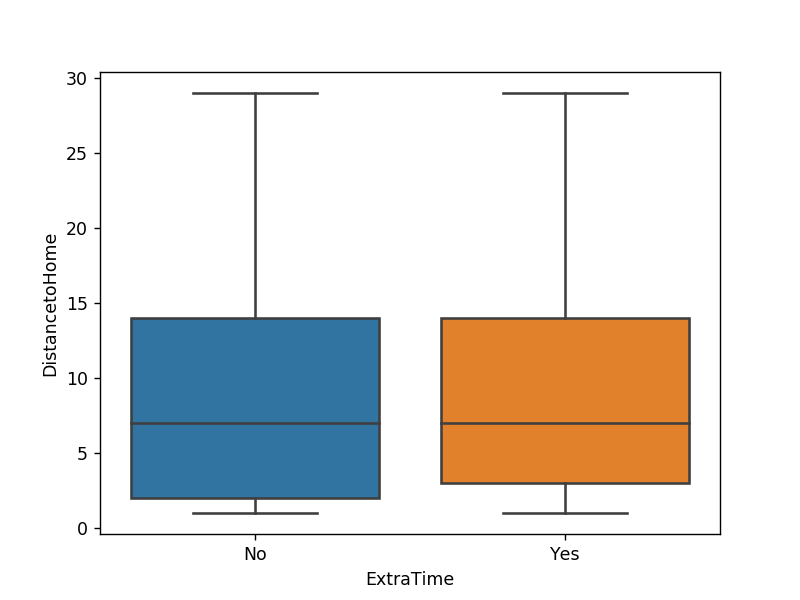

In [56]:
# first plot numeric data wrt to target to see if there is any dependence
import seaborn as sns

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.DistancetoHome)

# there is no impact

<IPython.core.display.Javascript object>


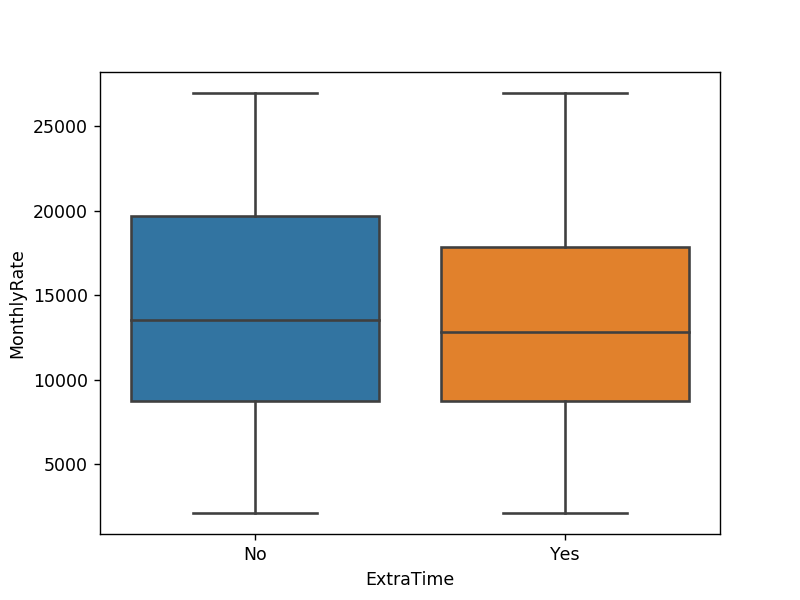

In [57]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyRate)

# there is not too much impact but mean value of Monthly rate is slightly less for Yes folks


<IPython.core.display.Javascript object>


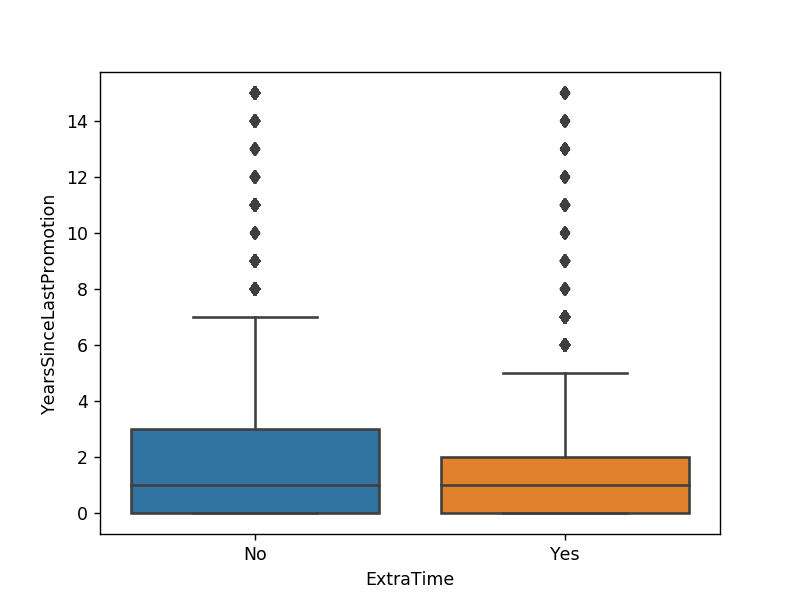

In [58]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.YearsSinceLastPromotion)

<IPython.core.display.Javascript object>


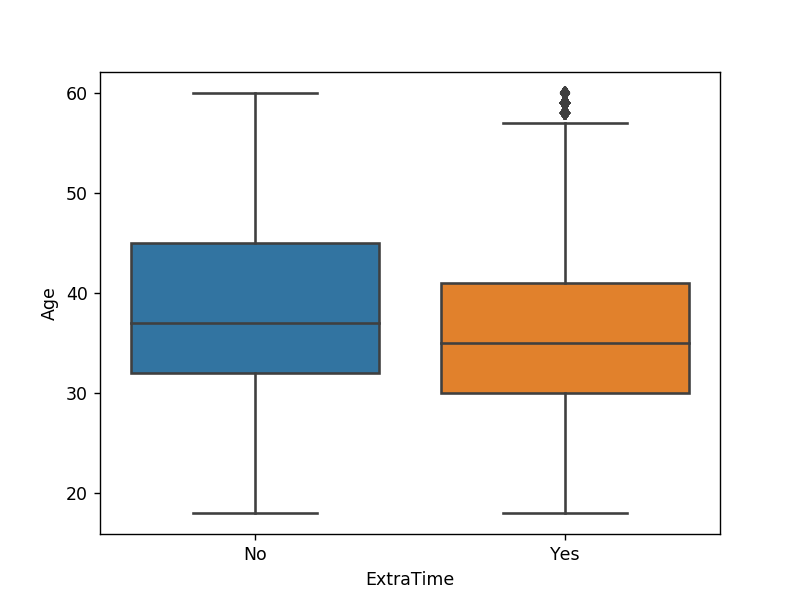

In [59]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.Age)

# as guessed lower age group seems to have higher proportion of Yes - extra time
# 

<IPython.core.display.Javascript object>


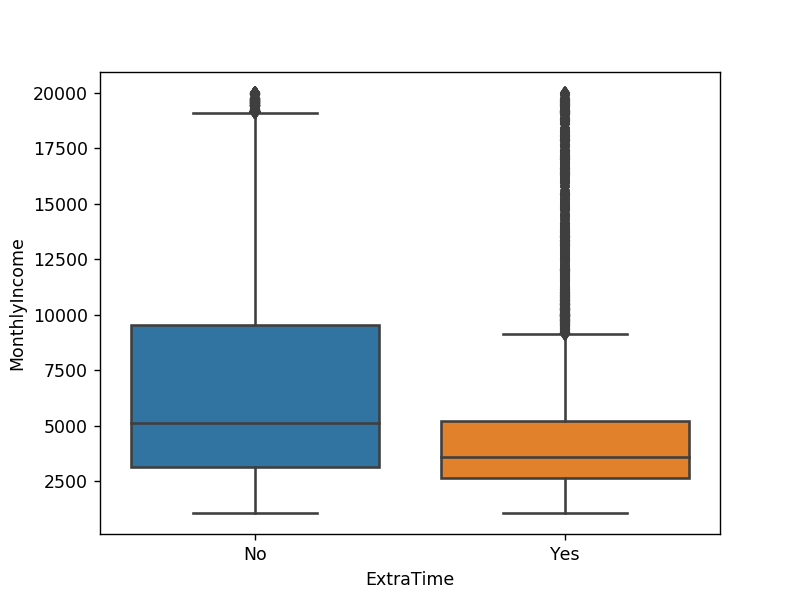

In [60]:

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyIncome)

# mean of Yes folks is lesser - makes sense

<IPython.core.display.Javascript object>


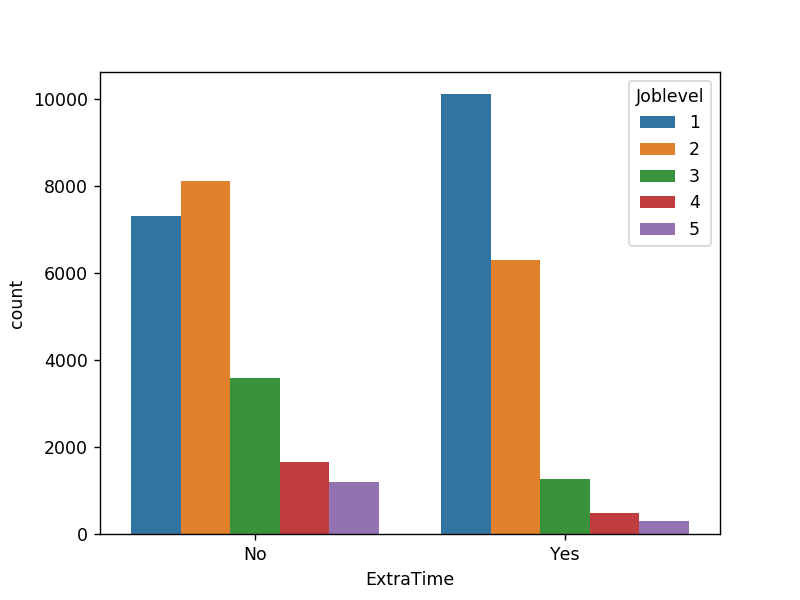

In [61]:
# since job level is correlated with MonthlyIncome let us check which is a better feature 

figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Joblevel)

# job level 1 seems have higher propensity for Extra time
# job all other levels seem to have lesser propensity for Extra time

# it is probably 


<IPython.core.display.Javascript object>


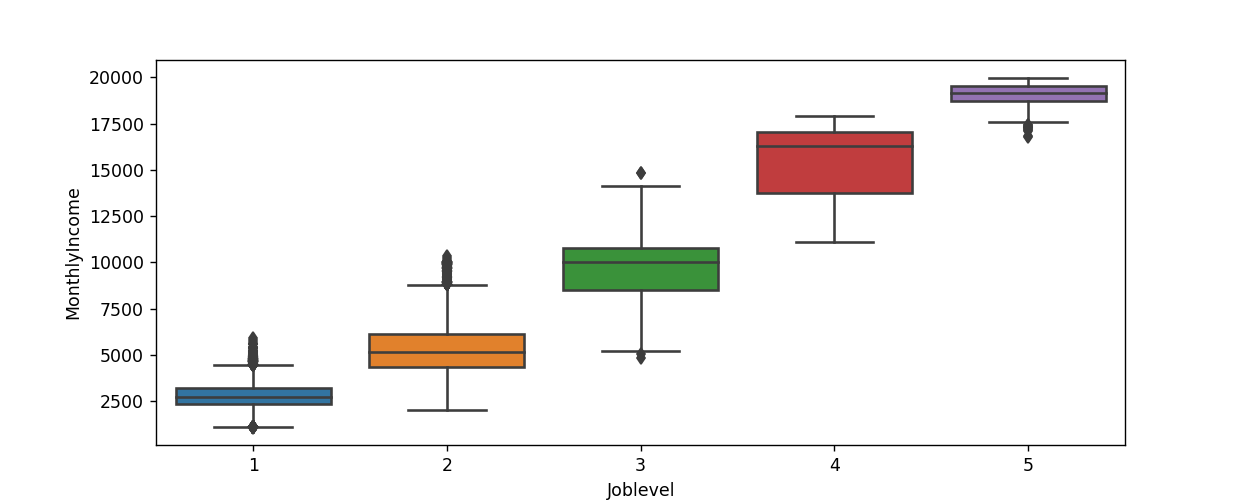

In [62]:
# check monthly income by job level

figs, axs = plt.subplots()
figs.set_size_inches(10,4)

sns.boxplot(x=train_x_initial.Joblevel, y=train_x_initial.MonthlyIncome)

<IPython.core.display.Javascript object>


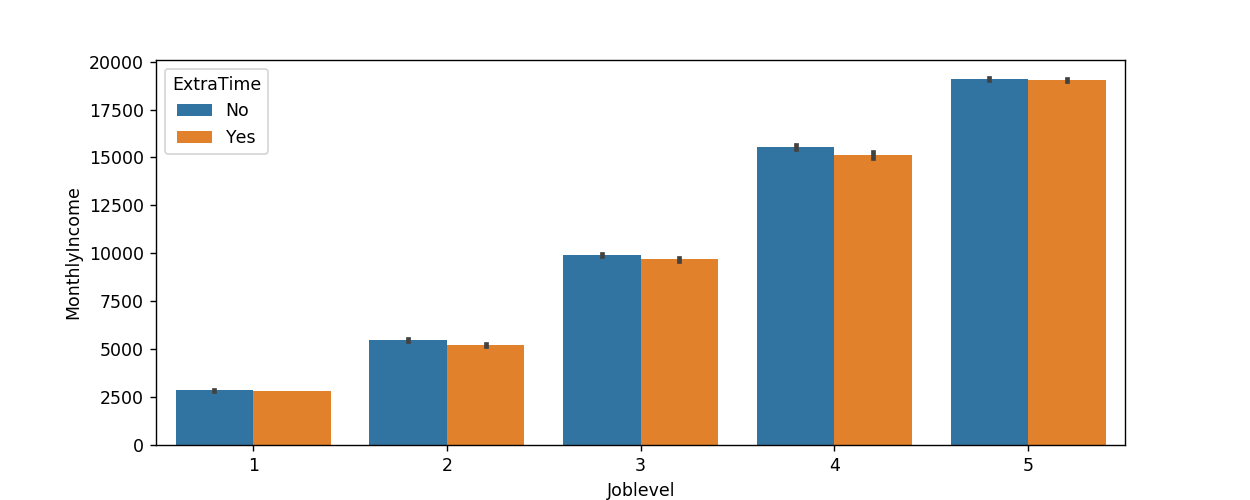

In [63]:
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.barplot(x=train_x_initial.Joblevel, y=train_x_initial.MonthlyIncome, hue=train_x_initial.ExtraTime)

<IPython.core.display.Javascript object>


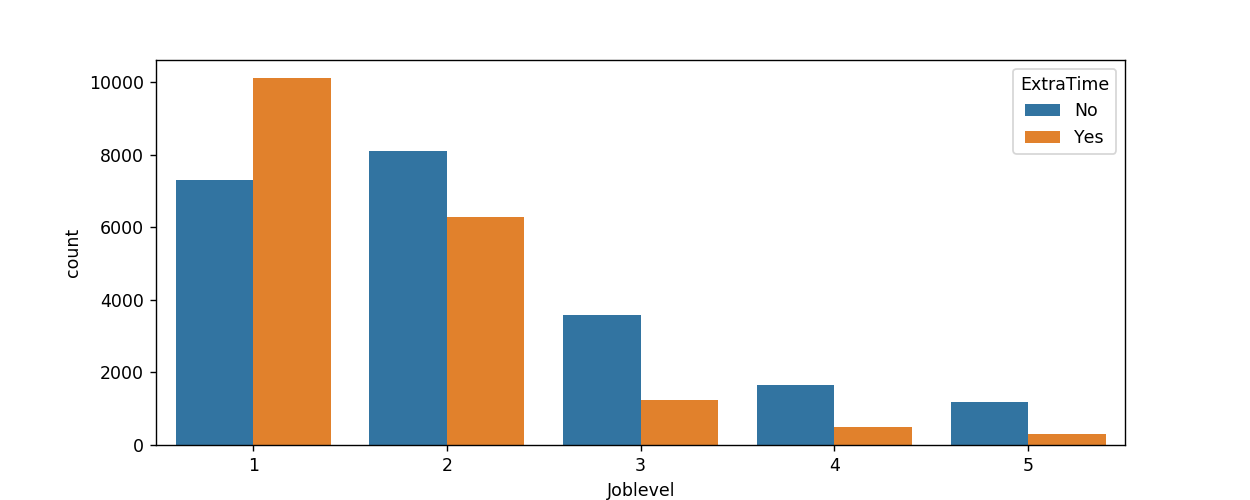

In [64]:
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.countplot(x=train_x_initial.Joblevel, hue=train_x_initial.ExtraTime)

# essentially Job level 1 has higher proportion of employees doing Extra time

# let us use JobLevel instead of MonthlyIncome
# Even though it may increase number features... since we have lot of data
# May be that is ok. 
# try one with Joblevel and the other with MonthlyIncome see which one gives better

<IPython.core.display.Javascript object>


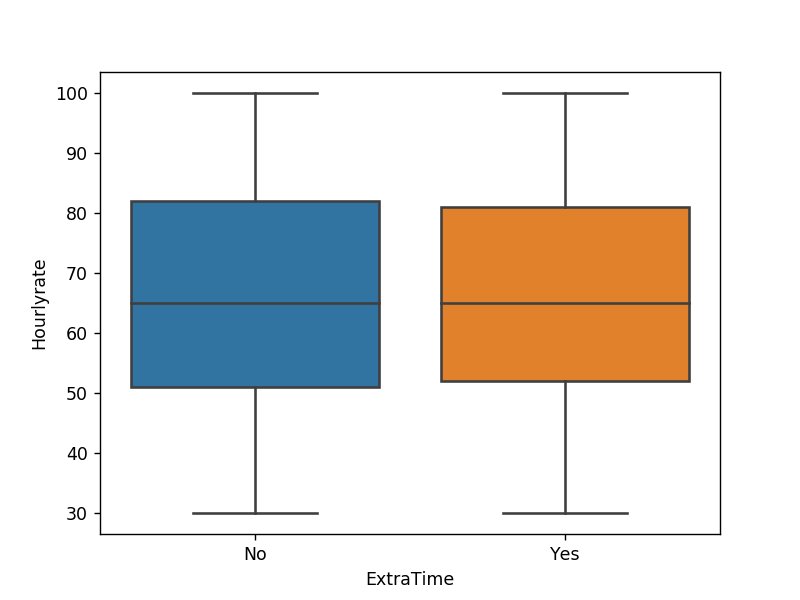

In [65]:
# check with hourly rate


figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.Hourlyrate)

# there doesn't seem to be any difference... 

<IPython.core.display.Javascript object>


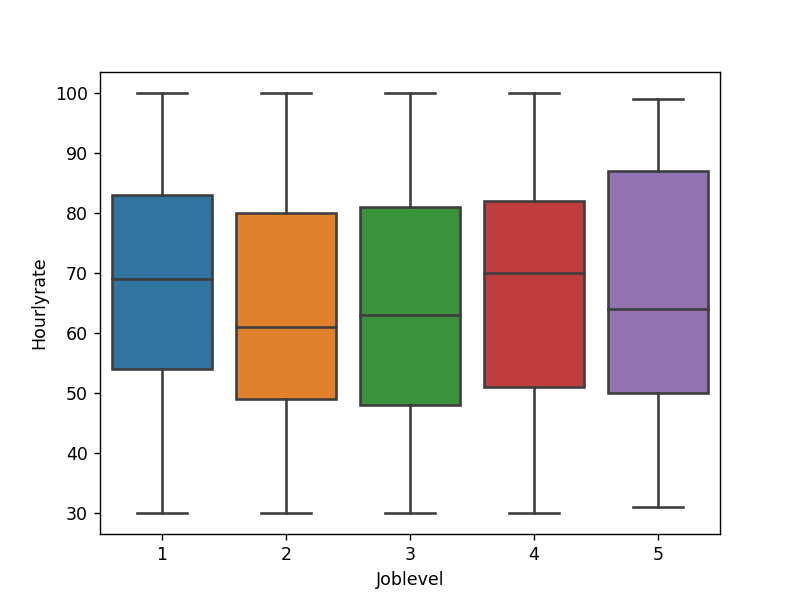

In [66]:

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.Joblevel, y=train_x_initial.Hourlyrate)

# not much difference in hourly rates across job levels! 
# Let us keep Hourly rate... 

<IPython.core.display.Javascript object>


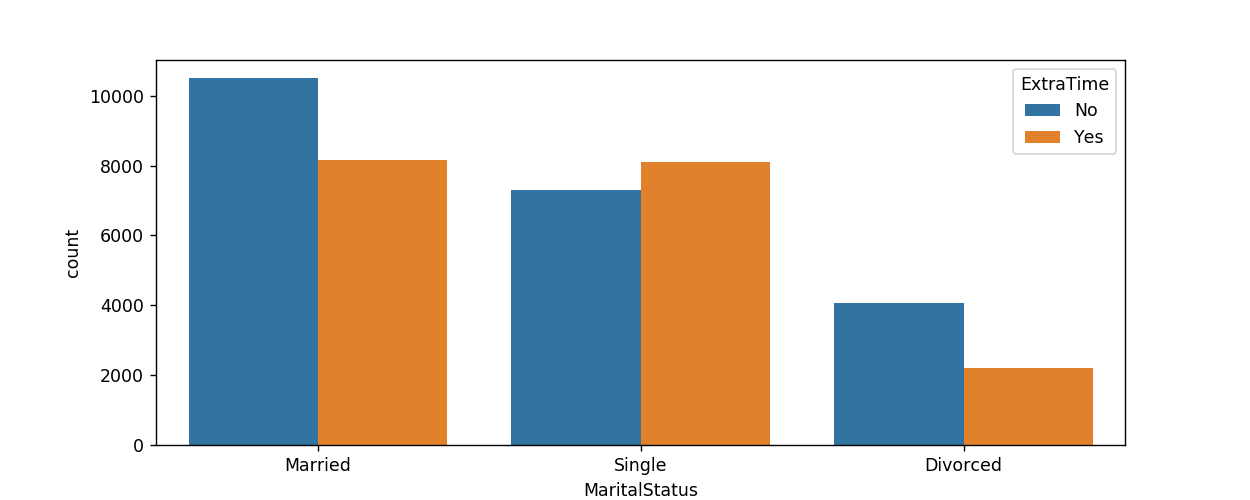

In [67]:
# does marital status have any impact?

figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.countplot(x=train_x_initial.MaritalStatus, hue=train_x_initial.ExtraTime)

# as expected single people have higher propensity for extratime

<IPython.core.display.Javascript object>


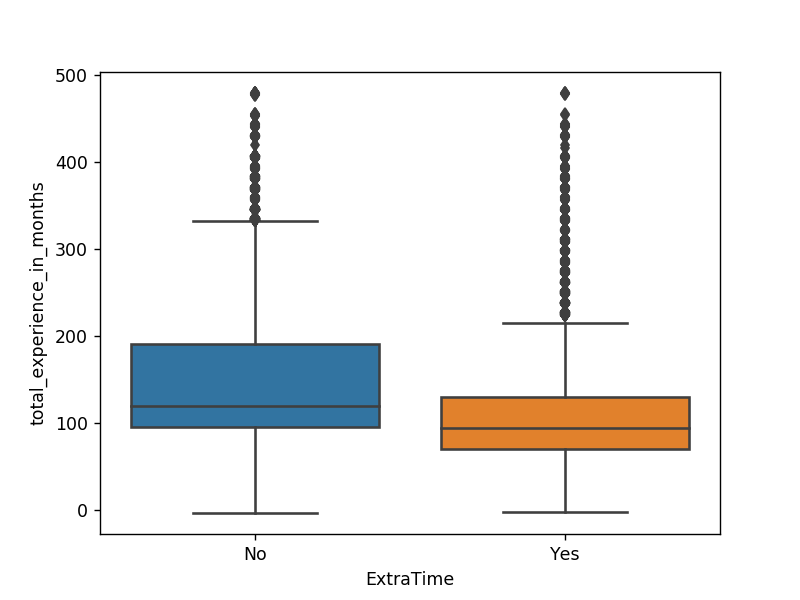

In [68]:
# are more experienced people staying late?


figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.total_experience_in_months)

# mean of Yes folks is slightly less



<IPython.core.display.Javascript object>


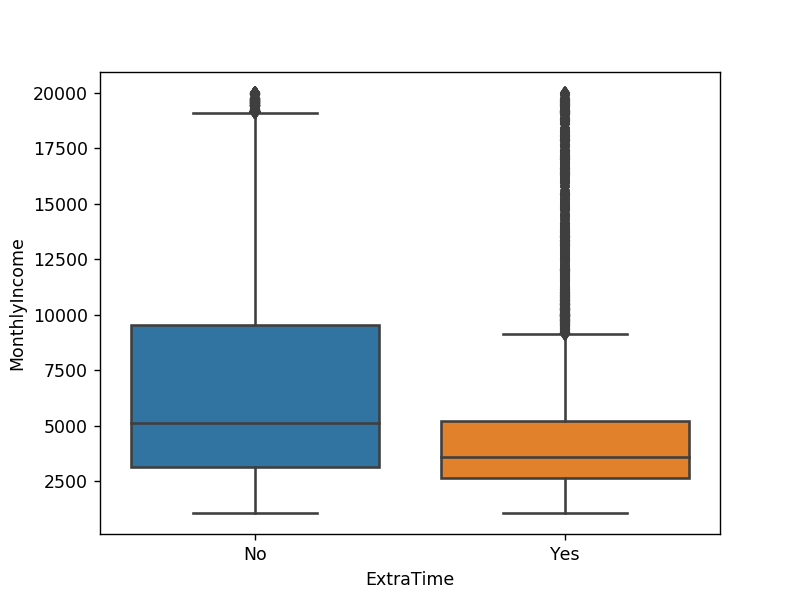

In [69]:
figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.MonthlyIncome)

<IPython.core.display.Javascript object>


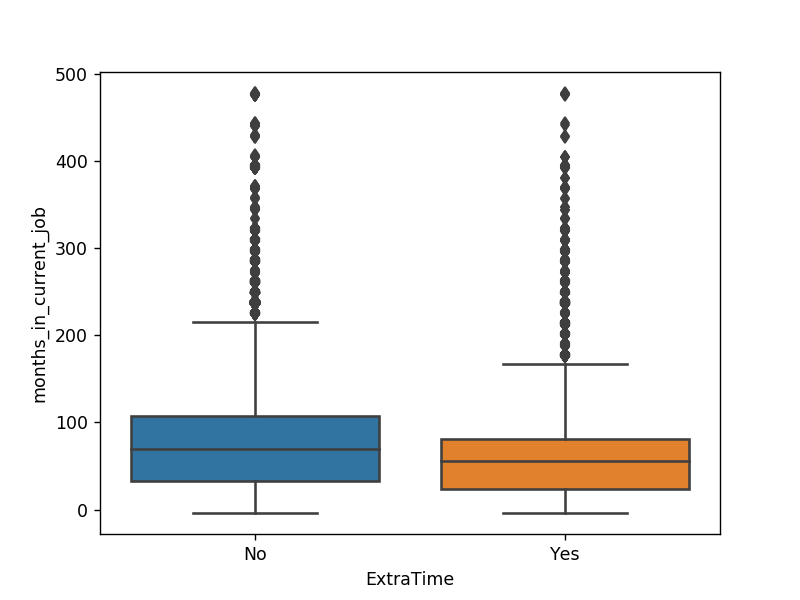

In [70]:
# what about experience in the company?

figs, axs = plt.subplots()

sns.boxplot(x=train_x_initial.ExtraTime, y=train_x_initial.months_in_current_job)

<IPython.core.display.Javascript object>


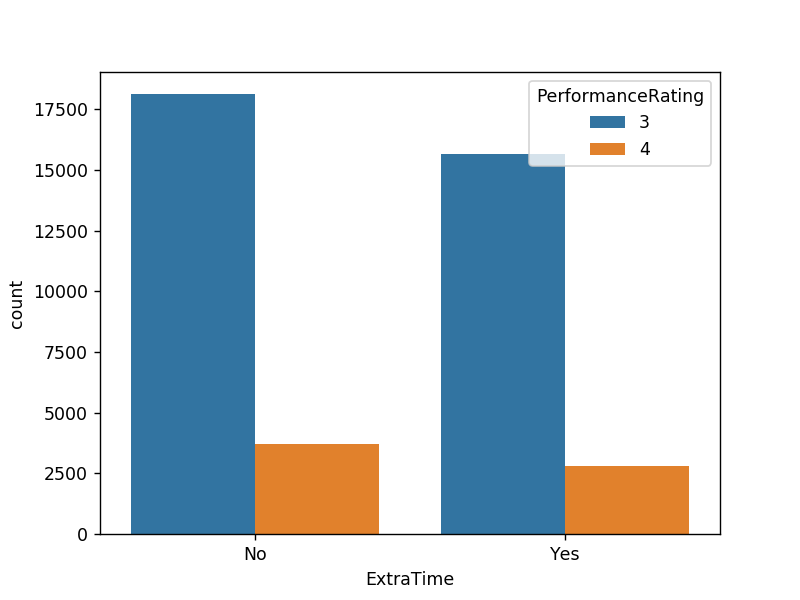

In [71]:
# people with ESOP?
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.PerformanceRating)

# doesn't seem to have any impact

<IPython.core.display.Javascript object>


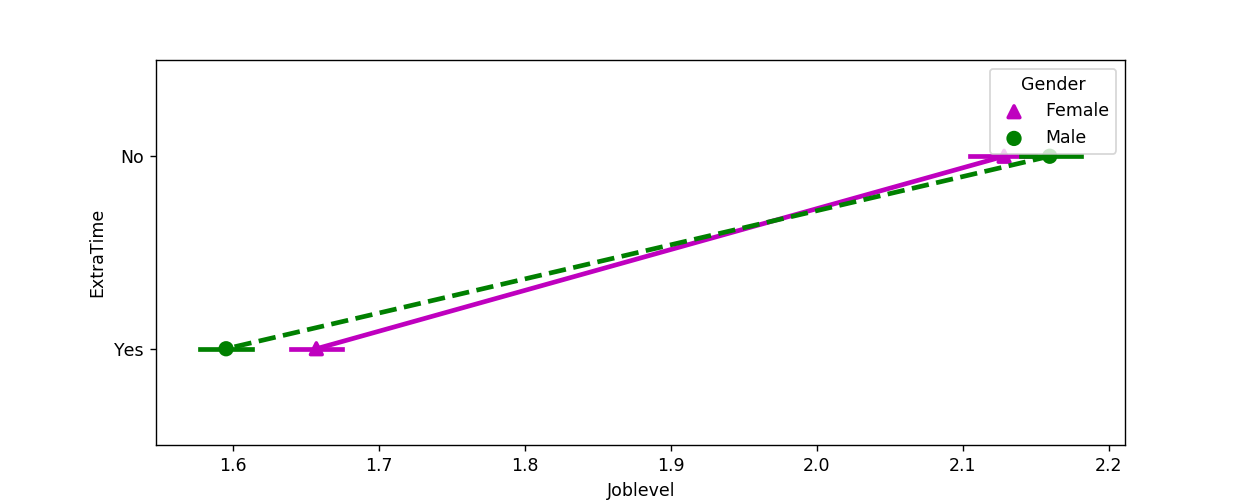

In [72]:
# joblevel Gender 
figs, axs = plt.subplots()
figs.set_size_inches(10,4)
sns.pointplot(x="Joblevel", y="ExtraTime", hue="Gender", data=train_x_initial,
              palette={"Male": "g", "Female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

In [73]:
func = lambda x: 100*x.count()/train_x_initial.shape[0]
# count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=['Joblevel'], values=['Gender'],
#                 aggfunc=len, margins=True, dropna=True, fill_value=0 )

# percent_table = count_table.div( count_table.iloc[:,-1], axis=0 )
# percent_table


count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Joblevel'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No    Yes
Joblevel              
1          7306  10106
2          8101   6293
3          3589   1252
4          1664    491
5          1192    309
ExtraTime        No       Yes
Joblevel                     
1          0.419596  0.580404
2          0.562804  0.437196
3          0.741376  0.258624
4          0.772158  0.227842
5          0.794137  0.205863


In [74]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Joblevel'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No    Yes
Joblevel              
1          7306  10106
2          8101   6293
3          3589   1252
4          1664    491
5          1192    309
ExtraTime        No       Yes
Joblevel                     
1          0.419596  0.580404
2          0.562804  0.437196
3          0.741376  0.258624
4          0.772158  0.227842
5          0.794137  0.205863


In [75]:
print(train_x_initial.ExtraTime.value_counts())
# yes to no ration
train_x_initial.loc[train_x_initial.ExtraTime == 'Yes','ExtraTime'].shape[0]/train_x_initial.shape[0]

# in the overall data No to Yes ration is 54.2% to 46% 

# so anything that has higher percentage is key influencer

# see which is increasing or decreasing the No %age Which combination



No     21852
Yes    18451
Name: ExtraTime, dtype: int64


0.45780711113316624

In [76]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Gender'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

# gender doesn't have any influence

ExtraTime     No   Yes
Gender                
Female      9616  8495
Male       12236  9956
ExtraTime        No       Yes
Gender                       
Female     0.530948  0.469052
Male       0.551370  0.448630


In [77]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'PerformanceRating'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")


ExtraTime             No    Yes
PerformanceRating              
3                  18129  15655
4                   3723   2796
ExtraTime                No       Yes
PerformanceRating                    
3                  0.536615  0.463385
4                  0.571100  0.428900


In [78]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Division'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime                  No    Yes
Division                            
Human Resources           771    532
Research & Development  15541  14418
Sales                    5540   3501
ExtraTime                     No       Yes
Division                                  
Human Resources         0.591711  0.408289
Research & Development  0.518742  0.481258
Sales                   0.612764  0.387236


In [79]:
count_table = pd.pivot_table(data=train_x_initial,columns=["ExtraTime"],  index=[ 'Education'], 
                 aggfunc='size')

print(count_table)

percent_table = count_table.div(count_table.iloc[:,1]+count_table.iloc[:,0], axis=0)
print(percent_table)
# pd.pivot_table(data=train_x_initial,  index=['Gender'], columns="ExtraTime",
#                  aggfunc="size")

ExtraTime    No   Yes
Education            
1          1867  1217
2          4998  5041
3          8602  8376
4          5618  3527
5           767   290
ExtraTime        No       Yes
Education                    
1          0.605383  0.394617
2          0.497858  0.502142
3          0.506656  0.493344
4          0.614325  0.385675
5          0.725639  0.274361


<IPython.core.display.Javascript object>


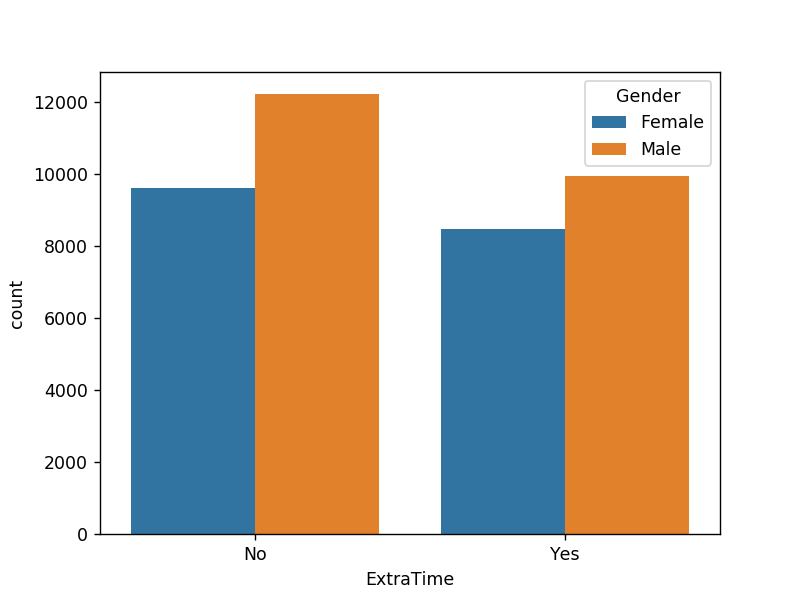

In [80]:
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Gender)
# there doesnt seem to be too much dependence on Gender for Extra time


<IPython.core.display.Javascript object>


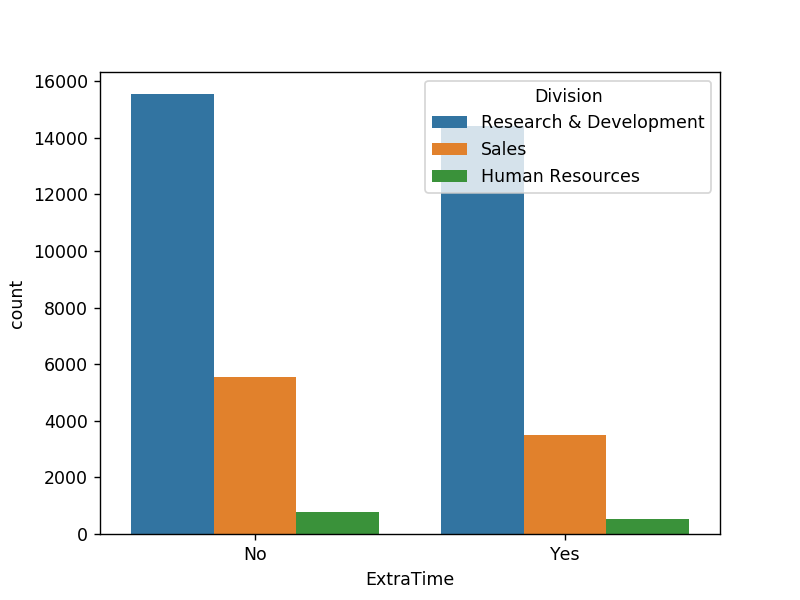

In [81]:
figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.Division)
# 

In [82]:
# check levels in train set
train_x_initial[cat_var].apply(lambda x:print(x.value_counts(dropna=False)))

1    17412
2    14394
3     4841
4     2155
5     1501
Name: Joblevel, dtype: int64
Less        30254
High         7138
NoTravel     2911
Name: FrequencyofTravel, dtype: int64
Male      22192
Female    18111
Name: Gender, dtype: int64
3    14703
4    13635
2     6107
1     5858
Name: OfficeAmbienceRating, dtype: int64
3    20760
2    13612
4     4249
1     1682
Name: SelfMotivationRating, dtype: int64
Research & Development    29959
Sales                      9041
Human Resources            1303
Name: Division, dtype: int64
Laboratory Technician        13283
Research Scientist            7059
Sales Executive               6598
Manufacturing Director        3573
Healthcare Representative     2984
Manager                       2101
Research Director             1988
Sales Representative          1554
Human Resources               1163
Name: JobRole, dtype: int64
3    12692
2    11379
4     9034
1     7198
Name: RelationshipSatisfaction, dtype: int64
3    16978
2    10039
4     9145
1    

Joblevel                    None
FrequencyofTravel           None
Gender                      None
OfficeAmbienceRating        None
SelfMotivationRating        None
Division                    None
JobRole                     None
RelationshipSatisfaction    None
Education                   None
No.ofWorkshopsAttended      None
NumberofCompaniesChanged    None
WorkLifeBalance             None
Emolumnet_in_Pecentage      None
Happynesslevelinjob         None
ESOps                       None
Specialization              None
PerformanceRating           None
MaritalStatus               None
dtype: object

In [83]:
test_x[cat_var].apply(lambda x:print(x.value_counts(dropna=False)))

1    4363
2    3533
3    1234
4     572
5     336
Name: Joblevel, dtype: int64
Less        7562
High        1726
NoTravel     750
Name: FrequencyofTravel, dtype: int64
Male      5539
Female    4499
Name: Gender, dtype: int64
3    3674
4    3330
1    1523
2    1511
Name: OfficeAmbienceRating, dtype: int64
3    5209
2    3395
4    1040
1     394
Name: SelfMotivationRating, dtype: int64
Research & Development    7424
Sales                     2291
Human Resources            323
Name: Division, dtype: int64
Laboratory Technician        3275
Research Scientist           1763
Sales Executive              1679
Manufacturing Director        886
Healthcare Representative     738
Manager                       530
Research Director             475
Sales Representative          420
Human Resources               272
Name: JobRole, dtype: int64
3    3198
2    2899
4    2184
1    1757
Name: RelationshipSatisfaction, dtype: int64
3    4272
2    2467
4    2301
1     756
5     242
Name: Education, dtype

Joblevel                    None
FrequencyofTravel           None
Gender                      None
OfficeAmbienceRating        None
SelfMotivationRating        None
Division                    None
JobRole                     None
RelationshipSatisfaction    None
Education                   None
No.ofWorkshopsAttended      None
NumberofCompaniesChanged    None
WorkLifeBalance             None
Emolumnet_in_Pecentage      None
Happynesslevelinjob         None
ESOps                       None
Specialization              None
PerformanceRating           None
MaritalStatus               None
dtype: object

In [84]:
# No difference in levels between test and train sets

<IPython.core.display.Javascript object>


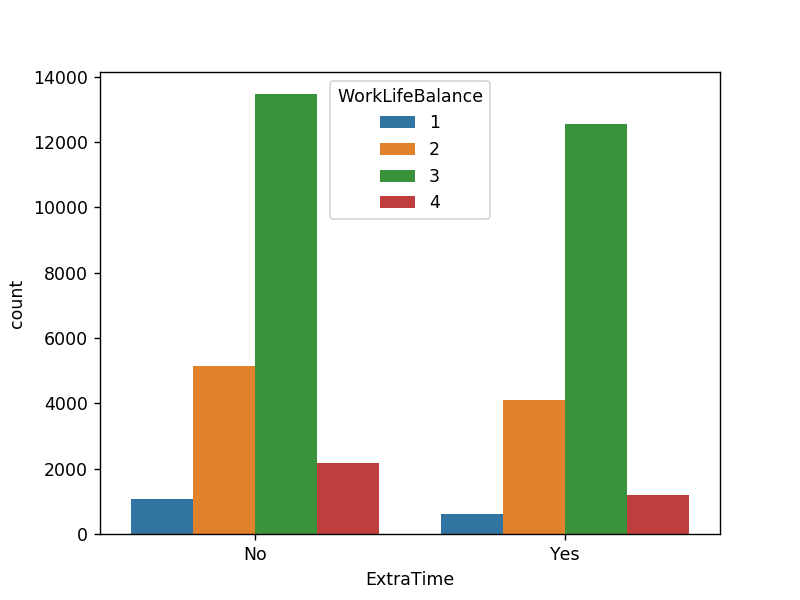

In [85]:
# does worklife balance have an impact?

figs, axs = plt.subplots()

sns.countplot(x=train_x_initial.ExtraTime, hue=train_x_initial.WorkLifeBalance)
# there 

In [86]:
cat_train = train_x[cat_var]
num_train = train_x[num_var]

cat_val = val_x[cat_var]
num_val = val_x[num_var]

cat_test = test_x[cat_var]
num_test = test_x[num_var]


In [87]:
cat_train[cat_train.columns] = cat_train[cat_train.columns].apply(lambda x:x.astype('category'))

cat_val[cat_val.columns] = cat_val[cat_val.columns].apply(lambda x:x.astype('category'))

cat_test[cat_test.columns] = cat_test[cat_test.columns].apply(lambda x:x.astype('category'))

C:\Users\prasanna.boni\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [88]:
# we now have to use LabelEncoder on categoric variables which 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


cat_train = cat_train.apply(LabelEncoder().fit_transform)
cat_val = cat_val.apply(LabelEncoder().fit_transform)
cat_test = cat_test.apply(LabelEncoder().fit_transform)

In [89]:
print(train_y.value_counts())

No     16405
Yes    13822
Name: ExtraTime, dtype: int64


In [90]:
train_encoder = LabelEncoder()
train_y = train_encoder.fit_transform(train_y)

In [91]:
print(nparray_value_counts(train_y))

[[    0 16405]
 [    1 13822]]
None


In [92]:
print(val_y.value_counts())

No     5447
Yes    4629
Name: ExtraTime, dtype: int64


In [93]:
val_y = LabelEncoder().fit_transform(val_y)


In [94]:
nparray_value_counts(val_y)

[[   0 5447]
 [   1 4629]]


In [95]:
cat_train[cat_train.columns] = cat_train[cat_train.columns].apply(lambda x:x.astype('category'))

cat_val[cat_val.columns] = cat_val[cat_val.columns].apply(lambda x:x.astype('category'))

cat_test[cat_test.columns] = cat_test[cat_test.columns].apply(lambda x:x.astype('category'))

In [96]:
# For model training

# Set 1 - 
# without dummification just with Label encoding

train_x_le = pd.concat([num_train, cat_train], axis=1)

val_x_le = pd.concat([num_val, cat_val], axis=1)

test_x_le = pd.concat([num_test, cat_test], axis=1)



In [97]:
# check shape just to make sure
print(train_x_le.shape)
print(val_x_le.shape)
print(test_x_le.shape)

(30227, 28)
(10076, 28)
(10038, 28)


In [98]:
# check zero variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
print(train_x_le.shape)
print((selector.fit_transform(train_x_le)).shape)

# no zero variance data

(30227, 28)
(30227, 28)


In [99]:
# scale numeric data

# now scale the numeric data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# scaler = StandardScaler()
# scaler.fit(train_x_dum)

num_train_scl = pd.DataFrame(scale(num_train), columns=num_train.columns)

num_val_scl = pd.DataFrame(scale(num_val), columns=num_val.columns)

num_test_scl = pd.DataFrame(scale(num_test), columns=num_test.columns)





In [101]:
num_train_scl.describe()

,DistancetoHome,MonthlyRate,YearsSinceLastPromotion,Hourlyrate,Age,YearsInCurrentRole,DialyRate,MonthlyIncome,total_experience_in_months,months_in_current_job
count,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04,3.022700e+04
mean,6.171293e-17,-6.239977e-17,-7.750295e-16,-3.083590e-16,2.840045e-16,2.979461e-16,-1.271649e-16,-5.422011e-17,-1.567763e-16,-9.073292e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.077203e+00,-1.771567e+00,-6.338786e-01,-1.971750e+00,-2.247236e+00,-1.176923e+00,-1.694789e+00,-1.102133e+00,-1.709318e+00,-1.209396e+00
25%,-8.174571e-01,-7.609712e-01,-6.338786e-01,-8.260612e-01,-7.684632e-01,-5.548055e-01,-8.741101e-01,-6.987834e-01,-6.371097e-01,-6.463126e-01
50%,-2.979645e-01,-9.572820e-02,-2.774354e-01,-6.226891e-02,-1.997044e-01,-2.437468e-01,3.320964e-02,-3.612821e-01,-1.956123e-01,-2.396414e-01
75%,6.111476e-01,8.250608e-01,7.900782e-02,8.651931e-01,7.103097e-01,6.894292e-01,9.092424e-01,2.240107e-01,2.963419e-01,3.390829e-01
max,2.559245e+00,2.021065e+00,4.712770e+00,1.847212e+00,2.530338e+00,4.422133e+00,1.664941e+00,3.239955e+00,4.383346e+00,6.329662e+00


In [216]:
print(num_train_scl.shape)
print(num_val_scl.shape)
print(num_test_scl.shape)

(30227, 10)
(10076, 10)
(10038, 10)


In [217]:
# sometimes not reseting index is creating probplems
num_train_scl.reset_index(drop=True, inplace=True)

num_val_scl.reset_index(drop=True, inplace=True)

num_test_scl.reset_index(drop=True, inplace=True)

cat_train.reset_index(drop=True, inplace=True)
cat_val.reset_index(drop=True, inplace=True)
cat_test.reset_index(drop=True, inplace=True)

train_x_le_scl = pd.concat([num_train_scl, cat_train], axis=1)

val_x_le_scl = pd.concat([num_val_scl, cat_val], axis=1)

test_x_le_scl = pd.concat([num_test_scl, cat_test], axis=1)



In [218]:
# check shape just to make sure
print(train_x_le_scl.shape)
print(val_x_le_scl.shape)
print(test_x_le_scl.shape)

(30227, 28)
(10076, 28)
(10038, 28)


In [219]:
# now create dummies for cat variables
cat_train_dummies = pd.get_dummies(cat_train)

cat_val_dummies = pd.get_dummies(cat_val)

cat_test_dummies = pd.get_dummies(cat_test)

In [220]:
print(cat_train_dummies.shape)
print(cat_val_dummies.shape)
print(cat_test_dummies.shape)

print(cat_train.shape)
cat_train_dummies.head()

(30227, 94)
(10076, 94)
(10038, 94)
(30227, 18)


,Joblevel_0,Joblevel_1,Joblevel_2,Joblevel_3,Joblevel_4,FrequencyofTravel_0,FrequencyofTravel_1,FrequencyofTravel_2,Gender_0,Gender_1,...,Specialization_1,Specialization_2,Specialization_3,Specialization_4,Specialization_5,PerformanceRating_0,PerformanceRating_1,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,0,0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [227]:
# sometimes not reseting index is creating probplems
num_train.reset_index(drop=True, inplace=True)

num_val.reset_index(drop=True, inplace=True)

num_test.reset_index(drop=True, inplace=True)

cat_train_dummies.reset_index(drop=True, inplace=True)
cat_val_dummies.reset_index(drop=True, inplace=True)
cat_test_dummies.reset_index(drop=True, inplace=True)

train_x_le_dum = pd.concat([num_train, cat_train_dummies], axis=1)

val_x_le_dum = pd.concat([num_val, cat_val_dummies], axis=1)

test_x_le_dum = pd.concat([num_test, cat_test_dummies], axis=1)

In [228]:
print(train_x_le_dum.shape)
print(val_x_le_dum.shape)
print(test_x_le_dum.shape)

(30227, 104)
(10076, 104)
(10038, 104)


In [229]:

train_x_le_dum_scl = pd.concat([num_train_scl, cat_train_dummies], axis=1)

val_x_le_dum_scl = pd.concat([num_val_scl, cat_val_dummies], axis=1)

test_x_le_dum_scl = pd.concat([num_test_scl, cat_test_dummies], axis=1)

In [230]:
print(train_x_le_dum_scl.shape)
print(val_x_le_dum_scl.shape)
print(test_x_le_dum_scl.shape)

(30227, 104)
(10076, 104)
(10038, 104)


In [231]:
# we now have several sets of data for modeling

# Set 1  just label encoded without dummification and scaling

# train_x_le
# val_x_le
# test_x_le

# Set 1 for RF and trees


# Set 2 dummified without scaling

# train_x_le_dum
# val_x_le_dum
# test_x_le_dum

# Set 2 for GBM and Adaboos

# set 3 dummified and scaled

# train_x_le_dum_scl
# val_x_le_dum_scl
# test_x_le_dum_scl

# Set 3 for SVM


In [232]:
# creating a function to plot ROC curves
def plot_roc_curve(estimator, val_x, val_y):
    from sklearn.metrics import roc_curve, auc


    # shuffle and split training and test sets


    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(val_y, estimator.predict_proba(val_x)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    text =  ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label=text)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    

from sklearn.metrics import accuracy_score, auc, cohen_kappa_score, f1_score, recall_score

def append_classification_metrics_df(mdata, mname, mtype, actual, pred ):
    mdata = mdata.append({'Model name':mname, 'Metric Type': mtype, 
                                    'Kappa':cohen_kappa_score(actual, pred),
                                    'Accuracy':accuracy_score(actual, pred), 
                                    'Recall':recall_score(actual, pred), 
                                    'F1 Score':f1_score(actual, pred)},
                    ignore_index=True)
    return mdata

In [233]:
# initialize the metrics DF
metrics_data = pd.DataFrame(columns=['Model name', 'Metric Type', 'Kappa', 'Accuracy', 'Recall', 'F1 Score'])

In [234]:
# let us do basic Random Forest 
grid_test_rf_simple = { "n_estimators"      : [1000],
               "criterion"         : [ "entropy"],
               "max_features"      : ['sqrt'],
               "max_depth"         : [None],
               "min_samples_split" : [20] }

In [254]:
# Let us do basic Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(oob_score=True)

grid_search_1 = GridSearchCV(forest, grid_test_rf_simple, n_jobs=-1, cv=3)

In [255]:
# simple random forest 
# use data without dummification and scaling
grid_search_1.fit(train_x_le, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000], 'criterion': ['entropy'], 'max_features': ['sqrt'], 'max_depth': [None], 'min_samples_split': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [256]:
pred_train_rf1 = grid_search_1.best_estimator_.predict(train_x_le)
pred_val_rf1 = grid_search_1.best_estimator_.predict(val_x_le)



In [257]:
nparray_value_counts(pred_train_rf1)
nparray_value_counts(train_y)


[[    0 16940]
 [    1 13287]]
[[    0 16405]
 [    1 13822]]


In [259]:
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - simple",
                                               'train',
                                               train_y,
                                               pred_train_rf1)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - simple",
                                               'val',
                                               val_y,
                                               pred_val_rf1)

metrics_data.tail(10)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.670465,0.836934,0.802344,0.818178
1,RF - simple,val,0.523347,0.762207,0.770361,0.748531


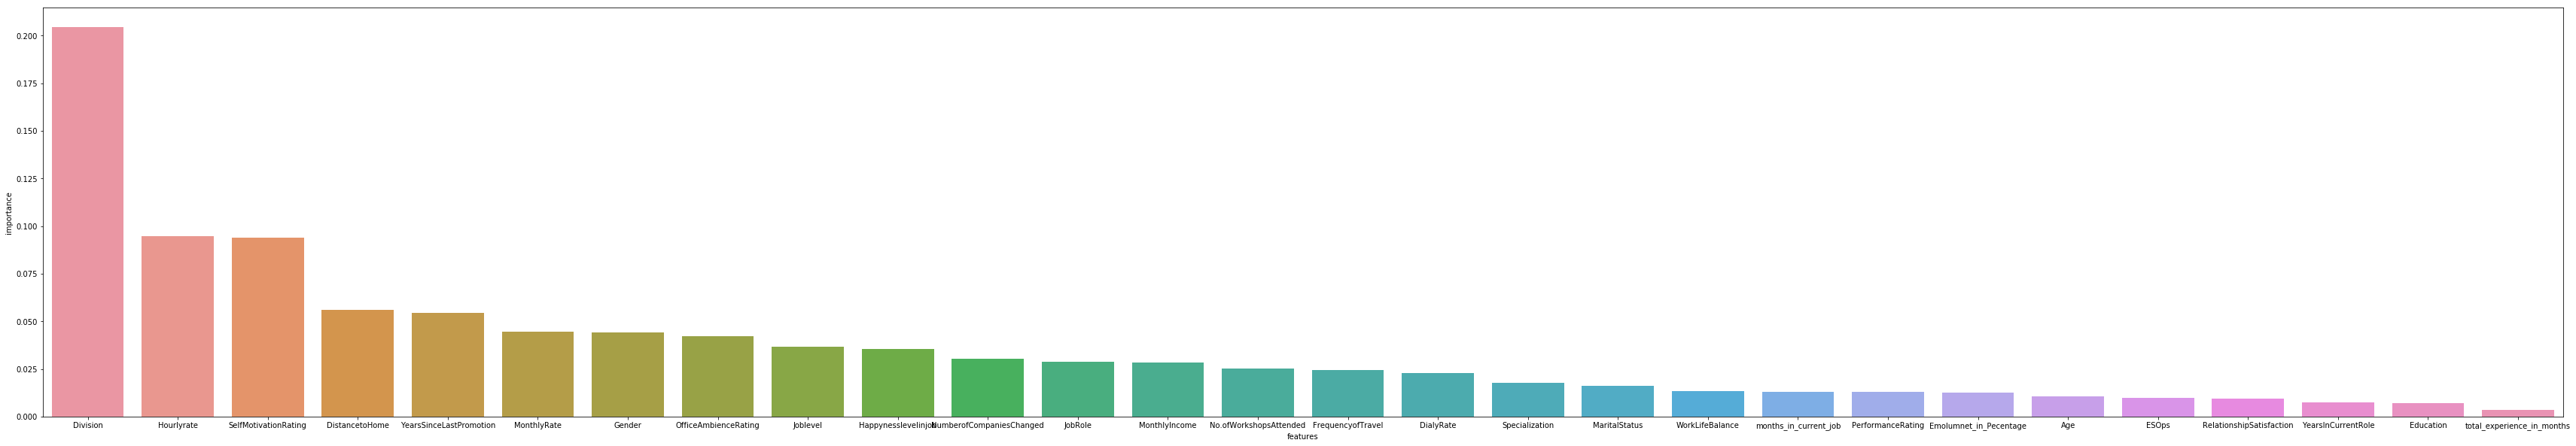

In [262]:
# check feature importance
# check feature importance
col_names = train_x.columns
feat_import = grid_search_1.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame(data={'features':col_names, 'importance':feat_import})

feature_importance_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importance_df.head(20)


import seaborn as sns
figs, axs = plt.subplots()
figs.set_size_inches(w=60,h=10)
sns.barplot(x=feature_importance_df.features, y=feature_importance_df.importance)
plt.show()


[0.20438718843593234, 0.2991021083613518, 0.3929784403674046, 0.4488257366580728, 0.5032272194480065, 0.547773550488136, 0.5918100813415923, 0.6338847572907262, 0.6706096361961184, 0.7061049999957137, 0.7365778406482244, 0.7653040553275405, 0.7937131763667019, 0.8189454267807683, 0.8434694525983489, 0.8662667816862003, 0.8839772999229952, 0.9002580231024535, 0.9135259407739351, 0.9266624293886978, 0.939603307129316, 0.95236926632702, 0.9628034994744217, 0.9726403699368903, 0.9821783344042657, 0.9895239164065217, 0.9965438438144495, 1.0000000000000002]


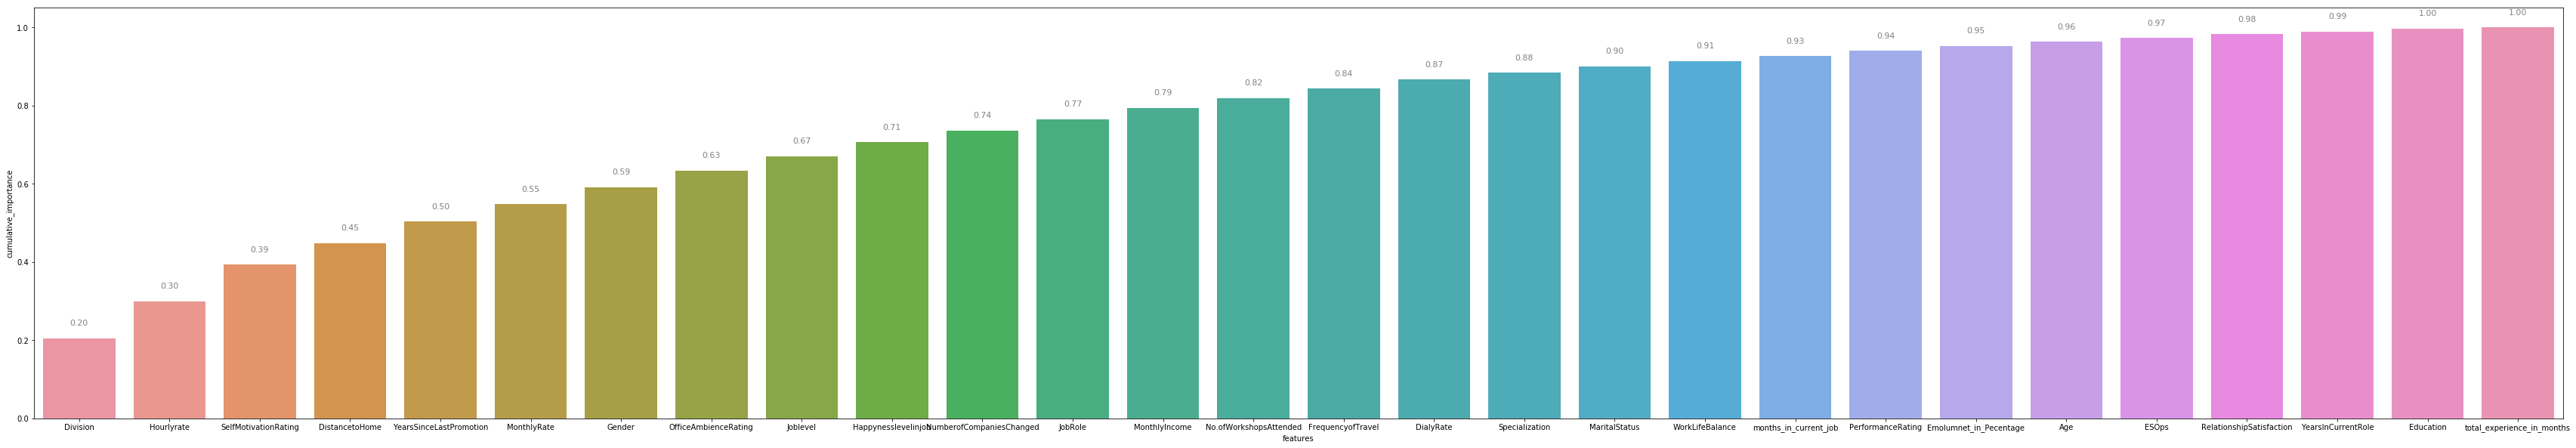

In [264]:
#feature_importance_df['cumulative_importance'] = feature_importance_df.importan
feature_importance_df.importance.count()
cum_importance = 0
list1 = []
for imp in feature_importance_df.importance:
    cum_importance = cum_importance + imp
    list1.append(cum_importance ) 
print(list1)

feature_importance_df['cumulative_importance']= list1

figs, axs = plt.subplots()
figs.set_size_inches(w=60, h=10)
g = sns.barplot(x=feature_importance_df.features, y=feature_importance_df['cumulative_importance'])


ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [265]:
pred_test_rf1 = grid_search_1.best_estimator_.predict(test_x_le)

In [266]:
nparray_value_counts(pred_test_rf1)

[[   0 5161]
 [   1 4877]]


In [267]:
submittion_df1 = submittion_df.copy(deep=True)

In [269]:
print(submittion_df1.shape)
submittion_df1.ExtraTime = pred_test_rf1

(10038, 2)


In [270]:
submittion_df1.ExtraTime.value_counts()

0    5161
1    4877
Name: ExtraTime, dtype: int64

In [271]:
submittion_df1.ExtraTime = submittion_df1.ExtraTime.map({1:'Yes', 0:"No"})

In [272]:
submittion_df1.ExtraTime.value_counts()

No     5161
Yes    4877
Name: ExtraTime, dtype: int64

In [274]:
submittion_df1.to_csv('prasanna_boni_submittion_rf_1.csv', index=False)

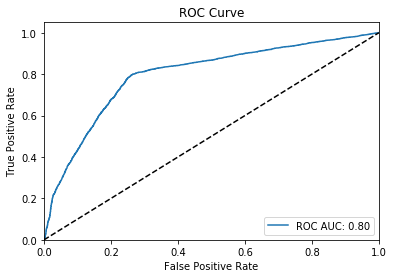

In [282]:
plot_roc_curve(grid_search_1.best_estimator_, val_x_le, val_y)

In [294]:
# grid search RF best parameters are: 
#{'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_split': 40, 'n_estimators': 1500}

# now do fit on full data and try

rf_final = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=6,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final.fit(train_x_le, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [295]:
pred_train_rf2 = rf_final.predict(train_x_le)
pred_val_rf2 = rf_final.predict(val_x_le)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - Final with tuned parameters",
                                               'train',
                                               train_y,
                                               pred_train_rf2)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - Final with tuned parameters",
                                               'val',
                                               val_y,
                                               pred_val_rf2)

print(metrics_data.tail(20))



pred_test_rf2 = rf_final.predict(test_x_le)

submittion_rf2 = submittion_df.copy(deep=True)

submittion_rf2.ExtraTime = pred_test_rf2

submittion_rf2.ExtraTime = submittion_rf2.ExtraTime.map({1:'Yes', 0:"No"})

submittion_rf2.to_csv('prasanna_boni_submittion_rf_with_tuned_params.csv', index=False)

                         Model name Metric Type     Kappa  Accuracy    Recall  \
0                       RF - simple       train  0.670465  0.836934  0.802344   
1                       RF - simple         val  0.523347  0.762207  0.770361   
2                      XGB - simple       train  0.602973  0.802594  0.795182   
3                      XGB - simple         val  0.518591  0.760222  0.757399   
4  RF - Final with tuned parameters       train  0.586559  0.793959  0.800391   
5  RF - Final with tuned parameters         val  0.528450  0.764688  0.774897   

   F1 Score  
0  0.818178  
1  0.748531  
2  0.786504  
3  0.743742  
4  0.780348  
5  0.751598  


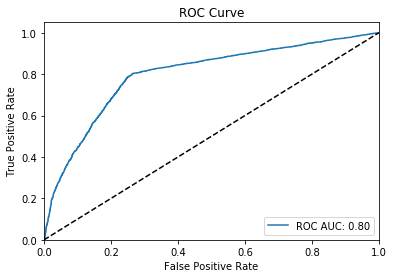

In [345]:
plot_roc_curve(rf_final, val_x_le, val_y)

In [322]:
col_names = train_x_le.columns
feat_import1 = rf_final.feature_importances_

feature_importance_df1 = pd.DataFrame(data={'features':col_names, 'importance':feat_import1})

feature_importance_df1.sort_values(by=['importance'], ascending=False, inplace=True)
print(feature_importance_df1)

                      features  importance
8   total_experience_in_months    0.234129
7                MonthlyIncome    0.097118
9        months_in_current_job    0.074991
5           YearsInCurrentRole    0.048105
1                  MonthlyRate    0.047318
6                    DialyRate    0.046690
20    NumberofCompaniesChanged    0.040309
4                          Age    0.040271
3                   Hourlyrate    0.039369
10                    Joblevel    0.036140
0               DistancetoHome    0.034351
16                     JobRole    0.032791
13        OfficeAmbienceRating    0.030398
22      Emolumnet_in_Pecentage    0.026674
19      No.ofWorkshopsAttended    0.025539
2      YearsSinceLastPromotion    0.024563
23         Happynesslevelinjob    0.017760
25              Specialization    0.013312
24                       ESOps    0.012914
17    RelationshipSatisfaction    0.012119
27               MaritalStatus    0.011570
18                   Education    0.011553
14        S

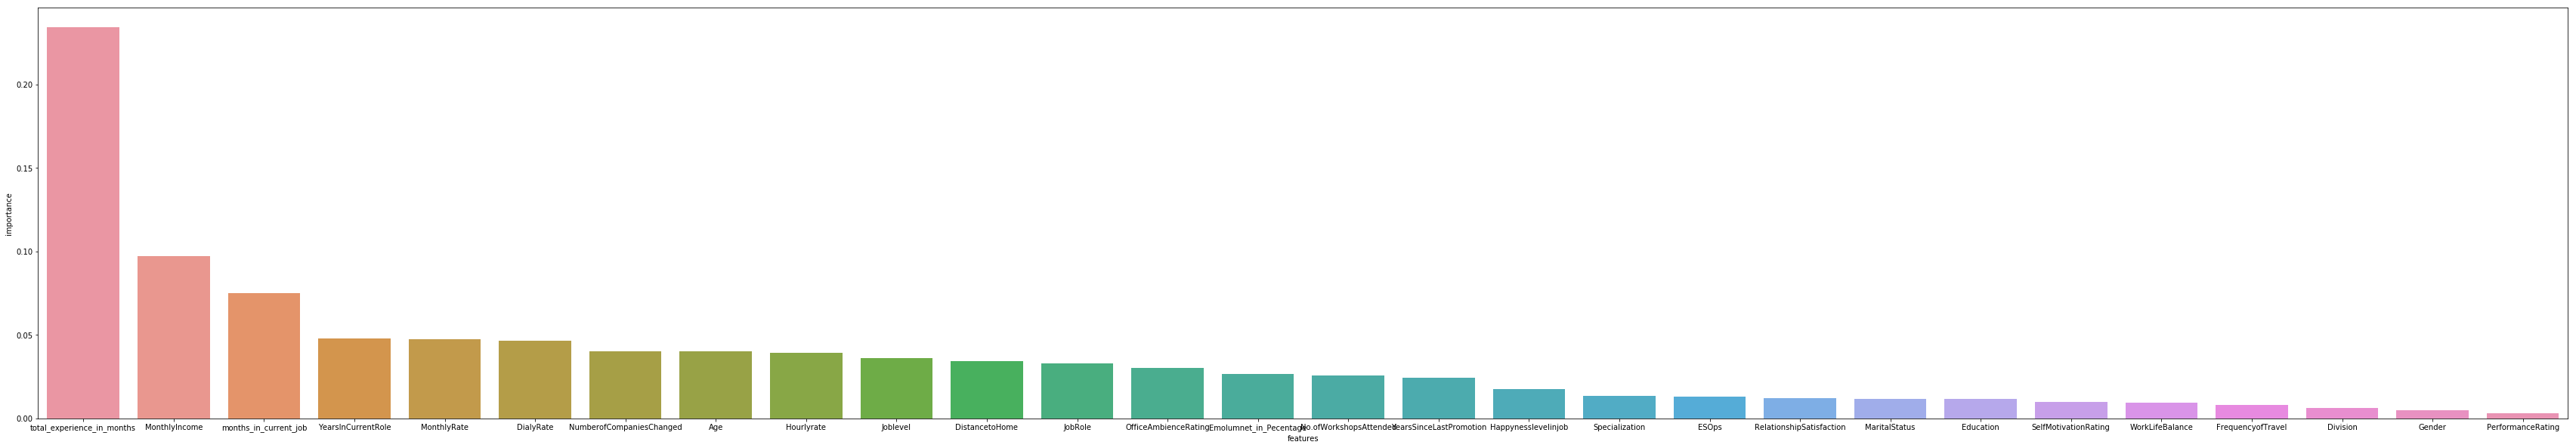

In [323]:
import seaborn as sns
figs, axs = plt.subplots()
figs.set_size_inches(w=60,h=10)
sns.barplot(x=feature_importance_df1.features, y=feature_importance_df1.importance)
plt.show()

[0.2341288046328682, 0.3312463915929862, 0.40623757192267784, 0.4543426583406642, 0.5016605214432759, 0.5483510170552008, 0.5886597317113239, 0.6289309129429085, 0.6682999037445362, 0.7044394433388417, 0.7387903835565142, 0.771581530717077, 0.8019792134683014, 0.8286532710622936, 0.8541921935873216, 0.8787553609146841, 0.8965150744876714, 0.9098272458295928, 0.9227417207115772, 0.9348610413258068, 0.946431176300213, 0.957984584792789, 0.9677224181634482, 0.9773495836949229, 0.9853441856703676, 0.9916823932136082, 0.9968264005343478, 0.9999999999999993]


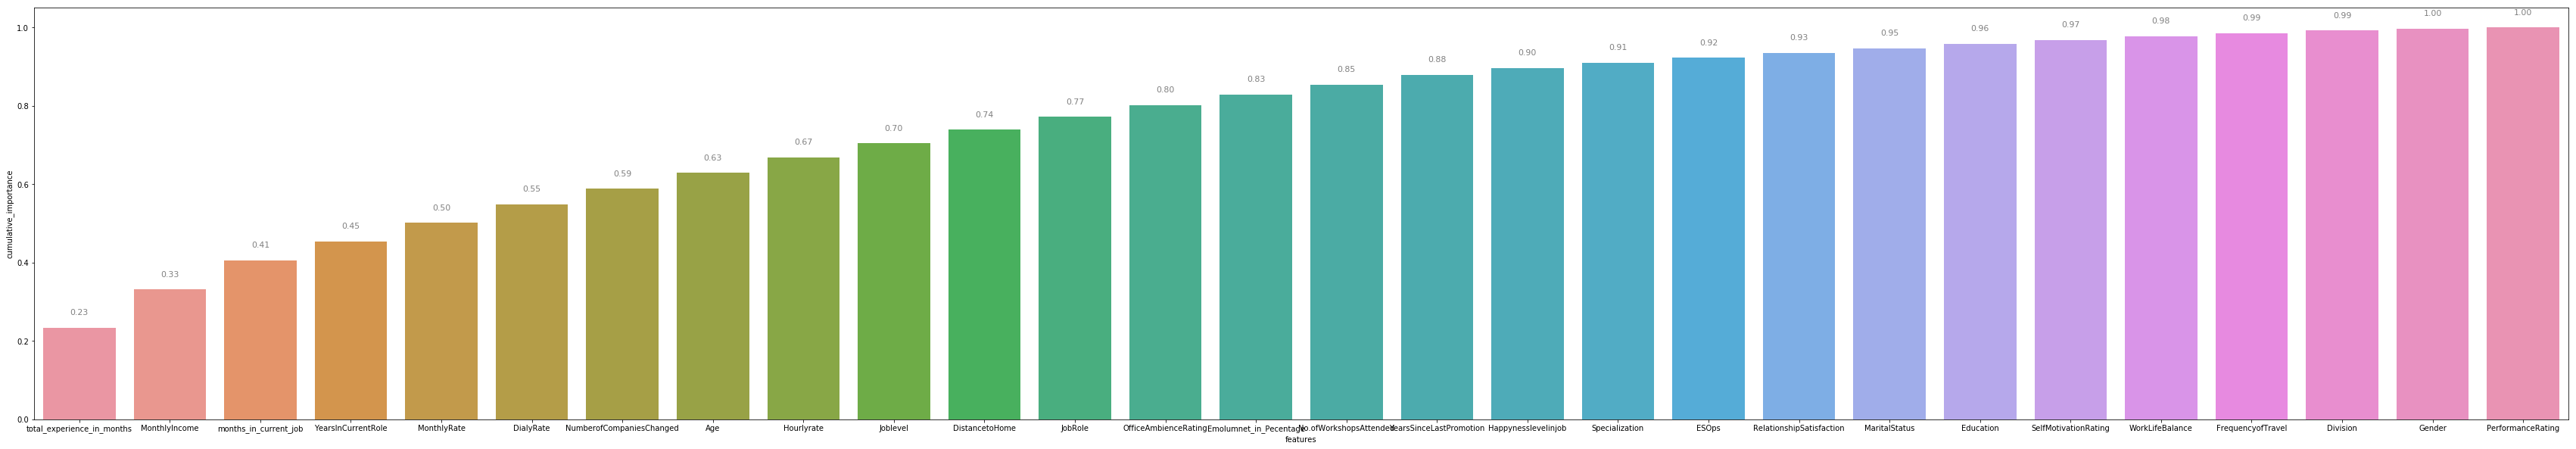

In [324]:
#feature_importance_df['cumulative_importance'] = feature_importance_df.importan
feature_importance_df1.importance.count()
cum_importance = 0
list1 = []
for imp in feature_importance_df1.importance:
    cum_importance = cum_importance + imp
    list1.append(cum_importance ) 
print(list1)

feature_importance_df1['cumulative_importance']= list1

figs, axs = plt.subplots()
figs.set_size_inches(w=60, h=10)
g = sns.barplot(x=feature_importance_df1.features, y=feature_importance_df1['cumulative_importance'])


ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

In [275]:
# 
# proper hyper parameter tuning for RF
grid_test_rf_full = { "n_estimators"      : [1500,2000],
               "criterion"         : ["entropy"],
               "max_features"      : [3,6,8],
               "max_depth"         : [3,7,11],
               "min_samples_split" : [40,60,200] }
sqrtfeat = np.sqrt((train_x_le.shape)[1])
grid_test_large = { "n_estimators"      : np.rint(np.linspace(train_x_le.shape[0]*2, train_x_le.shape[0]*3, 5)).astype(int),
                "criterion"         : ["gini", "entropy"],
                "max_features"      : np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                "max_depth"         : np.rint(np.linspace(1, train_x_le.shape[1]/2, 10)).astype(int),
                "min_samples_split" : np.rint(np.linspace(2, train_x_le.shape[0]/50, 10)).astype(int) }
grid_test_large

# use grid_test_large and prepare a grid_test_full ---- by modifying the parameters accordingly

{'criterion': ['gini', 'entropy'],
 'max_depth': array([ 1,  2,  4,  5,  7,  8, 10, 11, 13, 14]),
 'max_features': array([ 3,  5,  7,  9, 11]),
 'min_samples_split': array([  2,  69, 136, 203, 270, 337, 404, 471, 538, 605]),
 'n_estimators': array([60454, 68011, 75568, 83124, 90681])}

In [296]:
# Try tuning the parameters
# did the tuning on a different machine, hence commented out the fit method below
# to save time
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(oob_score=True)

grid_search_2 = GridSearchCV(forest, grid_test_rf_full, n_jobs=-1, cv=3)
#grid_search_2.fit(train_x_le, train_y)

# GridSearchCV(cv=3, error_score='raise',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=True, random_state=None, verbose=0, warm_start=False),
#        fit_params=None, iid=True, n_jobs=-1,
#        param_grid={'n_estimators': [1500], 'criterion': ['entropy'], 'max_features': [6], 'max_depth': [11, 13, 20, 25], 'min_samples_split': [10, 20, 40]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)

# 0.758725642637
# {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_split': 40, 'n_estimators': 1500}

In [276]:
# do XGB

# let us try XGB
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate

# params
# param = {
#     'n_estimators':[int(x) for x in np.linspace(200, 600, num = 8)] ,
#  'max_depth':[5,10,15,20,25],
#  'min_child_weight':[1,2,3,4],
#  'colsample_bytree':[0.8],
# # 'colsample_bylevel':[0.2,0.6,0.8],
# 'learning_rate':[0.1,0.2,0.3],
#     'subsample':[0.5],
#     'scale_pos_weight':[0.5, 1.5, 2],
#     'gamma':[0,0.1,0.2,0.3]
# }

xgb_grid = {
    'n_estimators':[1500] ,
 'max_depth':[8],
 'min_child_weight':[2],
 'colsample_bytree':[0.8],
# 'colsample_bylevel':[0.2,0.6,0.8],
'learning_rate':[0.01],
    'subsample':[0.5],
    'gamma':[0]
}
print(xgb_grid)



C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


{'n_estimators': [1500], 'max_depth': [8], 'min_child_weight': [2], 'colsample_bytree': [0.8], 'learning_rate': [0.01], 'subsample': [0.5], 'gamma': [0]}


In [277]:
# without balancing
xgbsearch = GridSearchCV(estimator = XGBClassifier( 
        objective= 'binary:logistic', 
        seed=1), 
    param_grid = xgb_grid, 
    scoring='accuracy',
    cv=3,
    verbose = 1)


In [278]:
xgbsearch.fit(train_x_le_dum,train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is a

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1500], 'max_depth': [8], 'min_child_weight': [2], 'colsample_bytree': [0.8], 'learning_rate': [0.01], 'subsample': [0.5], 'gamma': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [280]:
pred_train_xgb1 = xgbsearch.best_estimator_.predict(train_x_le_dum)
pred_val_xgb1 = xgbsearch.best_estimator_.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "XGB - simple",
                                               'train',
                                               train_y,
                                               pred_train_xgb1)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "XGB - simple",
                                               'val',
                                               val_y,
                                               pred_val_xgb1)

print(metrics_data.tail(10))



pred_test_xgb1 = xgbsearch.best_estimator_.predict(test_x_le_dum)

submittion_xgb1 = submittion_df.copy(deep=True)

submittion_xgb1.ExtraTime = pred_test_xgb1

submittion_xgb1.ExtraTime = submittion_xgb1.ExtraTime.map({1:'Yes', 0:"No"})

submittion_xgb1.to_csv('prasanna_boni_submittion_xgb_1.csv', index=False)

C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


     Model name Metric Type     Kappa  Accuracy    Recall  F1 Score
0   RF - simple       train  0.670465  0.836934  0.802344  0.818178
1   RF - simple         val  0.523347  0.762207  0.770361  0.748531
2  XGB - simple       train  0.602973  0.802594  0.795182  0.786504
3  XGB - simple         val  0.518591  0.760222  0.757399  0.743742


C:\Users\prasanna.boni\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [283]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
train_y_keras = to_categorical(train_y)
val_y_keras = to_categorical(val_y)

C:\Users\prasanna.boni\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [286]:
print(train_y.shape)
print(val_y.shape)
print(train_y_keras.shape)
print(val_y_keras.shape)
print(train_x_le_dum_scl.shape)
print(val_x_le_dum_scl.shape)
print(test_x_le_dum_scl.shape)

(30227,)
(10076,)
(30227, 2)
(10076, 2)
(30227, 104)
(10076, 104)
(10038, 104)


In [285]:
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.
from keras.models import Sequential 
from keras.layers import Dense

In [287]:
# Building a simple MLP

model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(12, kernel_initializer='uniform', input_dim = 104, activation='relu')) # Add a dense layer 
model.add(Dense(2, kernel_initializer='uniform', activation='softmax')) # Add output layer

In [288]:
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [292]:
nb_epochs = 500
# training the MLP model
#  
history = model.fit(train_x_le_dum_scl, train_y_keras, epochs=nb_epochs, batch_size=100, validation_split=0.1) 

Train on 27204 samples, validate on 3023 samples
Epoch 1/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5286 - acc: 0.7600 - val_loss: 0.5596 - val_acc: 0.7536
Epoch 2/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5284 - acc: 0.7607 - val_loss: 0.5594 - val_acc: 0.7516
Epoch 3/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5277 - acc: 0.7610 - val_loss: 0.5589 - val_acc: 0.7502
Epoch 4/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5284 - acc: 0.7615 - val_loss: 0.5600 - val_acc: 0.7506
Epoch 5/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5276 - acc: 0.7608 - val_loss: 0.5606 - val_acc: 0.7539
Epoch 6/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5280 - acc: 0.7608 - val_loss: 0.5597 - val_acc: 0.7516
Epoch 7/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5286 - acc: 0.7610 - val_loss: 0.5593 - v

Epoch 118/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5244 - acc: 0.7648 - val_loss: 0.5623 - val_acc: 0.7532
Epoch 119/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5238 - acc: 0.7650 - val_loss: 0.5609 - val_acc: 0.7516
Epoch 120/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5233 - acc: 0.7646 - val_loss: 0.5607 - val_acc: 0.7529
Epoch 121/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5240 - acc: 0.7632 - val_loss: 0.5617 - val_acc: 0.7509
Epoch 122/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5233 - acc: 0.7633 - val_loss: 0.5620 - val_acc: 0.7519
Epoch 123/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5237 - acc: 0.7646 - val_loss: 0.5623 - val_acc: 0.7469
Epoch 124/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5236 - acc: 0.7644 - val_loss: 0.5647 - val_acc: 0.7436
Epoch 125/500
27204/

27204/27204 [==============================] - 0s 14us/step - loss: 0.5218 - acc: 0.7654 - val_loss: 0.5628 - val_acc: 0.7509
Epoch 235/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5220 - acc: 0.7652 - val_loss: 0.5618 - val_acc: 0.7536
Epoch 236/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5222 - acc: 0.7660 - val_loss: 0.5617 - val_acc: 0.7516
Epoch 237/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5215 - acc: 0.7653 - val_loss: 0.5614 - val_acc: 0.7575
Epoch 238/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5215 - acc: 0.7666 - val_loss: 0.5642 - val_acc: 0.7493
Epoch 239/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5216 - acc: 0.7646 - val_loss: 0.5628 - val_acc: 0.7506
Epoch 240/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5215 - acc: 0.7670 - val_loss: 0.5630 - val_acc: 0.7559
Epoch 241/500
27204/27204 [=======

27204/27204 [==============================] - 0s 14us/step - loss: 0.5201 - acc: 0.7658 - val_loss: 0.5634 - val_acc: 0.7519
Epoch 351/500
27204/27204 [==============================] - 0s 16us/step - loss: 0.5206 - acc: 0.7668 - val_loss: 0.5631 - val_acc: 0.7532
Epoch 352/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5200 - acc: 0.7668 - val_loss: 0.5628 - val_acc: 0.7519
Epoch 353/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5203 - acc: 0.7654 - val_loss: 0.5639 - val_acc: 0.7496
Epoch 354/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5199 - acc: 0.7658 - val_loss: 0.5634 - val_acc: 0.7522
Epoch 355/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5203 - acc: 0.7667 - val_loss: 0.5631 - val_acc: 0.7506
Epoch 356/500
27204/27204 [==============================] - 0s 17us/step - loss: 0.5201 - acc: 0.7666 - val_loss: 0.5632 - val_acc: 0.7512
Epoch 357/500
27204/27204 [=======

27204/27204 [==============================] - 0s 13us/step - loss: 0.5196 - acc: 0.7660 - val_loss: 0.5635 - val_acc: 0.7545
Epoch 467/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5194 - acc: 0.7660 - val_loss: 0.5637 - val_acc: 0.7549
Epoch 468/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5198 - acc: 0.7653 - val_loss: 0.5633 - val_acc: 0.7539
Epoch 469/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5196 - acc: 0.7664 - val_loss: 0.5656 - val_acc: 0.7483
Epoch 470/500
27204/27204 [==============================] - 0s 14us/step - loss: 0.5193 - acc: 0.7651 - val_loss: 0.5664 - val_acc: 0.7512
Epoch 471/500
27204/27204 [==============================] - 0s 15us/step - loss: 0.5202 - acc: 0.7659 - val_loss: 0.5642 - val_acc: 0.7536
Epoch 472/500
27204/27204 [==============================] - 0s 13us/step - loss: 0.5196 - acc: 0.7657 - val_loss: 0.5623 - val_acc: 0.7555
Epoch 473/500
27204/27204 [=======

In [293]:
# Evaluate the model
score = model.evaluate(val_x_le_dum_scl, val_y_keras, verbose=0)
print('accuracy: ',score[1])

accuracy:  0.7472211194208758


In [297]:
pred_val_tf = model.predict_classes(val_x_le_dum_scl)
pred_train_tf = model.predict_classes(train_x_le_dum_scl)


metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Keras-TF1",
                                               'train',
                                               train_y,
                                               pred_train_tf)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Keras-TF1",
                                               'val',
                                               val_y,
                                               pred_val_tf)
metrics_data.head(20)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.670465,0.836934,0.802344,0.818178
1,RF - simple,val,0.523347,0.762207,0.770361,0.748531
2,XGB - simple,train,0.602973,0.802594,0.795182,0.786504
3,XGB - simple,val,0.518591,0.760222,0.757399,0.743742
4,RF - Final with tuned parameters,train,0.586559,0.793959,0.800391,0.780348
5,RF - Final with tuned parameters,val,0.528450,0.764688,0.774897,0.751598
6,Keras-TF1,train,0.528978,0.766235,0.743670,0.744208
7,Keras-TF1,val,0.490336,0.747221,0.715057,0.722156


In [298]:
# try SVM
# let us do GridSearchCV for SVC
from sklearn.svm import SVC
estimator_svm = SVC(random_state=30)


# C Penalty parameter
C = [float(x) for x in np.linspace(start = 0.3, stop = .9, num = 5)]

# Kernel to use
kernel = ['linear','rbf']
#kernel = ['rbf']
# gamma
gamma = [0.01,0.02,0.0,0.008]

shrinking  = [True]

# Tolerance for stopping parameter
tol = [1e-3]




grid = {'C': C,
               'kernel': kernel,
               'gamma': gamma,
               'shrinking': shrinking,
               'tol': tol}
print(grid)

{'C': [0.3, 0.45, 0.6000000000000001, 0.75, 0.9], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.02, 0.0, 0.008], 'shrinking': [True], 'tol': [0.001]}


In [299]:
from sklearn.model_selection import GridSearchCV

svc_grid = GridSearchCV(estimator=estimator_svm,
                       param_grid=grid,
                       n_jobs=-1,
                       cv=3)

In [301]:
# doing this fit on another machine to save time
# svc_grid.fit(train_x_le_dum_scl, train_y)


# GridSearchCV(cv=3, error_score='raise',
#        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=30, shrinking=True,
#   tol=0.001, verbose=False),
#        fit_params=None, iid=True, n_jobs=-1,
#        param_grid={'C': [0.3, 0.45, 0.6000000000000001, 0.75, 0.9], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.02, 0.0, 0.008], 'shrinking': [True], 'tol': [0.001]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)




In [ ]:
# doing this on another machine
# svc_estimator = svc_grid.best_estimator_
# svc_grid.best_params_


# {'C': 0.9, 'gamma': 0.02, 'kernel': 'rbf', 'shrinking': True, 'tol': 0.001}


# ran it in paper space
# 	Model name	Metric Type	Kappa	Accuracy	Recall	F1 Score
# 0	RF - simple	train	0.669865	0.836636	0.802055	0.817853
# 1	RF - simple	val	0.522283	0.761711	0.768849	0.747768
# 2	RF - grid search	train	0.550559	0.776425	0.769643	0.758936
# 3	RF - grid search	val	0.512750	0.757741	0.742925	0.738062
# 4	SVC grid search	train	0.518621	0.760247	0.759659	0.743442
# 5	SVC Grid Search	val	0.504579	0.753176	0.751566	0.736686

In [310]:
train_x_le.lt(0).sum()

DistancetoHome                   0
MonthlyRate                      0
YearsSinceLastPromotion          0
Hourlyrate                       0
Age                              0
YearsInCurrentRole               0
DialyRate                        0
MonthlyIncome                    0
total_experience_in_months      82
months_in_current_job         1047
Joblevel                         0
FrequencyofTravel                0
Gender                           0
OfficeAmbienceRating             0
SelfMotivationRating             0
Division                         0
JobRole                          0
RelationshipSatisfaction         0
Education                        0
No.ofWorkshopsAttended           0
NumberofCompaniesChanged         0
WorkLifeBalance                  0
Emolumnet_in_Pecentage           0
Happynesslevelinjob              0
ESOps                            0
Specialization                   0
PerformanceRating                0
MaritalStatus                    0
dtype: int64

In [311]:
# surprisingly there are negative values in months_in_current_job and total_experience_in_months
# possibly input data issues... date of join is ahead of datacollected date
# for now making them as 0
train_x_le_new = train_x_le.copy(deep=True)
val_x_le_new = val_x_le.copy(deep=True)
test_x_le_new = test_x_le.copy(deep=True)

In [313]:
print(train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(train_x_le_new.loc[train_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())


82
0


In [314]:
print(train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(train_x_le_new.loc[train_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(val_x_le_new.loc[val_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(val_x_le_new.loc[val_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())


1047
0
385
0
23
0


In [315]:
print(test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'].count())
test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'] = 0
print(test_x_le_new.loc[test_x_le_new.months_in_current_job <0,'months_in_current_job'].count())

print(test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())
test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'] = 0
print(test_x_le_new.loc[test_x_le_new.total_experience_in_months <0,'total_experience_in_months'].count())

364
0
20
0


In [316]:
# try Navive bayes?

# try naive bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_x_le_new,train_y)

pred_train_mnb = mnb.predict(train_x_le_new)
pred_val_mnb = mnb.predict(val_x_le_new)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Naive Bayes Multinomial",
                                               'train',
                                               train_y,
                                               pred_train_mnb)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "Naive Bayes Multinomial",
                                               'val',
                                               val_y,
                                               pred_val_mnb)

metrics_data.tail(20)

,Model name,Metric Type,Kappa,Accuracy,Recall,F1 Score
0,RF - simple,train,0.670465,0.836934,0.802344,0.818178
1,RF - simple,val,0.523347,0.762207,0.770361,0.748531
2,XGB - simple,train,0.602973,0.802594,0.795182,0.786504
3,XGB - simple,val,0.518591,0.760222,0.757399,0.743742
4,RF - Final with tuned parameters,train,0.586559,0.793959,0.800391,0.780348
5,RF - Final with tuned parameters,val,0.528450,0.764688,0.774897,0.751598
6,Keras-TF1,train,0.528978,0.766235,0.743670,0.744208
7,Keras-TF1,val,0.490336,0.747221,0.715057,0.722156
8,Naive Bayes Multinomial,train,0.165676,0.576107,0.686442,0.596936
9,Naive Bayes Multinomial,val,0.156937,0.571655,0.686325,0.595501


In [318]:
print(train_x_le_new.columns)
print(cat_var)
print(num_var)

Index(['DistancetoHome', 'MonthlyRate', 'YearsSinceLastPromotion',
       'Hourlyrate', 'Age', 'YearsInCurrentRole', 'DialyRate', 'MonthlyIncome',
       'total_experience_in_months', 'months_in_current_job', 'Joblevel',
       'FrequencyofTravel', 'Gender', 'OfficeAmbienceRating',
       'SelfMotivationRating', 'Division', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'Happynesslevelinjob', 'ESOps', 'Specialization', 'PerformanceRating',
       'MaritalStatus'],
      dtype='object')
['Joblevel', 'FrequencyofTravel', 'Gender', 'OfficeAmbienceRating', 'SelfMotivationRating', 'Division', 'JobRole', 'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended', 'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage', 'Happynesslevelinjob', 'ESOps', 'Specialization', 'PerformanceRating', 'MaritalStatus']
['DistancetoHome', 'MonthlyRate', 'YearsS

In [337]:
# let us now try to do some feature removal and additional feature engineering jobs
# remove 

#YearsSinceLastPromotion has lot of zeroes 46% let us remove this column 

# Joblevel and MonthlyIncome are highly correlated  - let us remove JobLevel  - has lesser importance fromm RF Plot

# Let us remove all the below columns based on < 5% importance rule
#'Joblevel', 'DistancetoHome', 'JobRole', 'OfficeAmbienceRating', 
#'Emolumnet_in_Pecentage', 'No.ofWorkshopsAttended', 'YearsSinceLastPromotion', 'Happynesslevelinjob', 
#'Specialization', 'ESOps', 'RelationshipSatisfaction', 'MaritalStatus', 'Education', 'SelfMotivationRating', 
#'WorkLifeBalance', 'FrequencyofTravel', 'Division', 'Gender', 'PerformanceRating

# Joblevel', 'DistancetoHome', 'JobRole', 'OfficeAmbienceRating', 'Emolumnet_in_Pecentage', 'No.ofWorkshopsAttended', 'YearsSinceLastPromotion', 'Happynesslevelinjob', 'Specialization', 'ESOps', 'RelationshipSatisfaction', 'MaritalStatus', 'Education', 'SelfMotivationRating', 'WorkLifeBalance', 'FrequencyofTravel', 'Division', 'Gender', 'PerformanceRating

less_important_var = ['Joblevel','DistancetoHome','JobRole','OfficeAmbienceRating','Emolumnet_in_Pecentage',
                      'No.ofWorkshopsAttended','YearsSinceLastPromotion','Happynesslevelinjob',
                      'Specialization','ESOps','RelationshipSatisfaction','MaritalStatus',
                      'Education','SelfMotivationRating','WorkLifeBalance','FrequencyofTravel',
                      'Division','Gender','PerformanceRating']



len(less_important_var)

19

In [335]:
train_x_le_new.shape

(30227, 28)

In [340]:
train_x_le_new_2 = train_x_le_new.drop(columns=less_important_var, axis=1)
val_x_le_new_2 = val_x_le_new.drop(columns=less_important_var)
test_x_le_new_2 = test_x_le_new.drop(columns=less_important_var, axis=1)

In [341]:
# let us now try RF with this

rf_final_reduced_features = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=2,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final_reduced_features.fit(train_x_le_new_2, train_y)



ValueError: Number of features of the model must match the input. Model n_features is 28 and input n_features is 9 

In [354]:
pred_train_rf3 = rf_final_reduced_features.predict(train_x_le_new_2)
pred_val_rf3 = rf_final_reduced_features.predict(val_x_le_new_2)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - reduced features2",
                                               'train',
                                               train_y,
                                               pred_train_rf3)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - reduced features2",
                                               'val',
                                               val_y,
                                               pred_val_rf3)

print(metrics_data.tail(20))





                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.670465  0.836934   
1                        RF - simple         val  0.523347  0.762207   
2                       XGB - simple       train  0.602973  0.802594   
3                       XGB - simple         val  0.518591  0.760222   
4   RF - Final with tuned parameters       train  0.586559  0.793959   
5   RF - Final with tuned parameters         val  0.528450  0.764688   
6                          Keras-TF1       train  0.528978  0.766235   
7                          Keras-TF1         val  0.490336  0.747221   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10             RF - reduced features       train  0.586559  0.793959   
11             RF - reduced features         val  0.528450  0.764688   
12            RF - reduced features2       train  0.593302  0.79

In [343]:
pred_test_rf3 = rf_final_reduced_features.predict(test_x_le_new_2)

submittion_rf3 = submittion_df.copy(deep=True)

submittion_rf3.ExtraTime = pred_test_rf3

submittion_rf3.ExtraTime = submittion_rf3.ExtraTime.map({1:'Yes', 0:"No"})

submittion_rf3.to_csv('prasanna_boni_submittion_rf_reduced_feat.csv', index=False)

In [344]:
metrics_data.to_csv("prasanna_boni_model_metrics_1.csv", index=False)

In [351]:
print(cat_train.shape)
print(cat_val.shape)
print(cat_test.shape)

(30227, 18)
(10076, 18)
(10038, 18)


In [353]:
# Let us do RF on only categorical data and see what happens
#cat_train
#cat_val
#cat_test

rf_final_cat_data = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=5,
                                 min_samples_split=40,
                                 oob_score=True)
rf_final_cat_data.fit(cat_train, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [355]:
pred_train_rf4 = rf_final_cat_data.predict(cat_train)
pred_val_rf4 = rf_final_cat_data.predict(cat_val)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - categorical data only",
                                               'train',
                                               train_y,
                                               pred_train_rf4)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "RF - categorical data only",
                                               'val',
                                               val_y,
                                               pred_val_rf4)

print(metrics_data.tail(20))

                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.670465  0.836934   
1                        RF - simple         val  0.523347  0.762207   
2                       XGB - simple       train  0.602973  0.802594   
3                       XGB - simple         val  0.518591  0.760222   
4   RF - Final with tuned parameters       train  0.586559  0.793959   
5   RF - Final with tuned parameters         val  0.528450  0.764688   
6                          Keras-TF1       train  0.528978  0.766235   
7                          Keras-TF1         val  0.490336  0.747221   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10             RF - reduced features       train  0.586559  0.793959   
11             RF - reduced features         val  0.528450  0.764688   
12            RF - reduced features2       train  0.593302  0.79

In [356]:
metrics_data.to_csv("prasanna_boni_model_metrics_2.csv", index=False)

In [363]:
# now try AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_ada = AdaBoostClassifier(random_state=90)


base_estimator = [DecisionTreeClassifier(max_depth=20, min_samples_leaf=1)]

n_estimators = [1500] 

learning_rate = [float(x) for x in np.linspace(0.9, 1.1, num = 5)] 


grid_ada = {'base_estimator': base_estimator,
               'n_estimators': n_estimators,
               'learning_rate': learning_rate}
print(grid_ada)

{'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')], 'n_estimators': [1500], 'learning_rate': [0.9, 0.9500000000000001, 1.0, 1.05, 1.1]}


In [364]:
adaboost_grid = GridSearchCV(estimator=model_ada,
                       param_grid=grid_ada,
                       n_jobs=-1,
                       cv=3)

In [365]:
adaboost_grid.fit(train_x_le_dum, train_y)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=90),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')], 'n_estimators': [1500], 'learning_rate': [0.9, 0.9500000000000001, 1.0, 1.05, 1.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [366]:
ada_estimator = adaboost_grid.best_estimator_
print(adaboost_grid.best_params_)
print(adaboost_grid.best_score_)

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 1.0, 'n_estimators': 1500}
0.684619710854534


In [367]:
pred_train_ada = ada_estimator.predict(train_x_le_dum)
pred_val_ada = ada_estimator.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost",
                                               'train',
                                               train_y,
                                               pred_train_ada)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost",
                                               'val',
                                               val_y,
                                               pred_val_ada)

print(metrics_data.tail(20))

                          Model name Metric Type     Kappa  Accuracy  \
0                        RF - simple       train  0.670465  0.836934   
1                        RF - simple         val  0.523347  0.762207   
2                       XGB - simple       train  0.602973  0.802594   
3                       XGB - simple         val  0.518591  0.760222   
4   RF - Final with tuned parameters       train  0.586559  0.793959   
5   RF - Final with tuned parameters         val  0.528450  0.764688   
6                          Keras-TF1       train  0.528978  0.766235   
7                          Keras-TF1         val  0.490336  0.747221   
8            Naive Bayes Multinomial       train  0.165676  0.576107   
9            Naive Bayes Multinomial         val  0.156937  0.571655   
10             RF - reduced features       train  0.586559  0.793959   
11             RF - reduced features         val  0.528450  0.764688   
12            RF - reduced features2       train  0.593302  0.79

In [368]:
metrics_data.to_csv('metrics_data_with_ada.csv', index=False)

In [369]:
rf_final_ada = RandomForestClassifier(n_estimators=1500, 
                                 criterion='entropy',
                                 max_depth=20,
                                 max_features=6,
                                 min_samples_split=40,
                                 oob_score=True)

In [372]:
ada_final = AdaBoostClassifier(random_state=90, base_estimator=rf_final_ada, n_estimators=50)

In [ ]:
ada_final.fit(train_x_le_dum, train_y)

In [ ]:
pred_train_ada_final = ada_final.predict(train_x_le_dum)
pred_val_ada_final = ada_final.predict(val_x_le_dum)

metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost final with entropy",
                                               'train',
                                               train_y,
                                               pred_train_ada_final)
metrics_data = append_classification_metrics_df(metrics_data, 
                                                "AdaBoost final with entropy",
                                               'val',
                                               val_y,
                                               pred_val_ada_final)

print(metrics_data.tail(20))